<center>
<H3>
Zika and Microcephaly in Brazil - 
How weather, population growth, and sanitation have impacted
the development of microcephaly cases linked to Zika

</H3>
</center>

### 1. Background
Zika, discovered in 1947 in Uganda is a flavivirus transmitted by the genus *Aedes*
that has been found as the cause of human infections across Africa and Asia. In 2007
a massive outbreak of Zika was reported on the Island of Yap (Micronesia), from
where the virus migrated to Southeast Asia, landing in the French Polynesia in
2013-14. In South America, more specifically in Brazil, the first reports of locally
transmitted infection were reported in May 2015, and in October 2015, the Brazilian
Government reported their first case of microcephaly related to Zika (Calvet et al., 2016; Kindhauser, Allen, Frank, Santhana, & Dye, 2016). 

By February 2016 the infection moved rapidly through Latin America, and the rapid rate of increase of microcephaly cases related with Zika in Brazil prompted WHO to declare zika infections associated with microcephaly and other neurological disorders a "public health emergency of international concern" (WHO, 2016). 

Although researchers have so far not proven a definite link between microcephaly cases in Brazil and zika, the extent of which it has been studied included changes on temperature, deforestation and more. (E. Petersen et al., 2016).  Currently, there is no available treatment or vaccine for zika, therefore; disease control is restricted to mosquito management via insecticides or larva breeding destruction(Yakob & Walker, 2016). Moreover, the lack of detail and credible information on how individuals, primarily adults, acquired the virus makes the prevention and treatment a challenge that has open the door for multiple theories and explanations.

This case study tries to explain how weather conditions from January 2015 to May 2016, projected 2015 and 2016 total population of men and women within a reproductive age (15-44), prevalence of microcephaly cases, growth rate of microcephaly, and sanitation and demographic characteristics of the 27 Brazilian states have influenced the increase of microcephaly confirmed reported cases linked to zika from February 2016 to May 2016.  To describe and report variables/features with greater emphasis on microcephaly, the study uses linear regression, lasso and ridge methods, regression trees, random forest regression and gradient boosting regressor. 



### 2. Data

Perhaps one of the most challenges points of this case study has to do with the construction of the multiple datasets, the quality of the collected data - especially the reported microcephaly cases - and lack of complimentary datasets at the state level, which have the potential to introduce error or bias into the analysis.

The final dataset contains the microcephaly confirmed cases collected by the CDC epidemic prevention initiative GitHub repository (CDC, 2016), which were manually/visually validated against the weekly reports of Zika from the Minesterio da Saude of Brazil (Ministério da Saúde -Brazil, 2016). I complemented this dataset with climate data from the Iowa Environmental Mesonet (The Iowa Environmental Mesonet, 2016), and urban characteristics of household surroundings from the Instituto Brasileiro de Geografia e Estatistica (Instituto Brasileiro de Geografia e Estatística, 2016).
Here I am providing the links to the websites from where the datasets come from:

##### a) Zika
1. https://github.com/cdcepi/zika
2. http://portalsaude.saude.gov.br/index.php/o-ministerio/principal/leia-mais-o-ministerio/197-secretaria-svs/20799-microcefalia

##### b) Climate 
1. https://mesonet.agron.iastate.edu/request/download.phtml?network=BR__ASOS


##### c) Population, State characteristics
1. http://www.ibge.gov.br/home/estatistica/populacao/projecao_da_populacao/2013/default_tab.shtm

2. http://www.ibge.gov.br/home/geociencias/areaterritorial/principal.shtm
3. http://www.ibge.gov.br/estadosat/index.php




### 3. Results

The method that offers a reliable explanation on the train and test data is random forest regression (see graph Model Performance), from which population density, men and women within reproductive age, and weather indicators from February 2016 have the stronger descriptive power. Although the same control variables are used on each model, the results obtained with the random forest regression model should not be considered as definitive. First of all, there are not clear medical or clinical answers on how microcephaly is linked to Zika, and how the reported cases are directly related to mothers infected with the virus. Besides, other factors like deforestation and dams should be included to have a complete picture of how the weather is related to Zika and microcephaly. Nonetheless, the results from this case study should be used as guidance for more elaborate studies.  




### 4. Methods
### 4.1 Datasets
#### a) Microcephaly data

The lack of uniform and standardized definition for microcephaly has challenged the accurate monitoring of the disease; therefore, the Center for Disease and Control and Prevention (CDC) has suggested defining microcephaly as an "occipitofrontal circumference below the third percentile for gestational age and sex" (Petersen, Jamieson, Powers, & Honein, 2016).

Following this definition, the Minesterio da Saude of Brazil has been collecting and reporting microcephaly confirmed and fatal confirmed cases at the state level. From the February 2016 to June 2016 reports I found that the average number of microcephaly confirmed cases were 39.56, and the average number of microcephaly fatal confirmed cases were 1.68. 

The Brazilian states located in the Northeast region presented the highest number of microcephaly confirmed cases from Feruary 13 to to June 4 (graph 1). These are Pernambuco (5050 cases), Bahia (3362 cases), Paraiba (1704 cases), Rio Grande do Norte (1528 cases), Maranhao(1287 cases), Ceara (1240 cases), Piaui (1106 cases), Alagoas (858 cases), and Sergipe (576 cases). Rio de Janeiro and Sao Paulo reported a total of 504 and 48 cases respectively. The states that reported the lowest number of cases were Acre (1 case) and Santa Catarina (4 cases), which are part of the North and South regions respectively.

The state of Ceara, Rio Grande do Norte, and Paraiba reported the highest number of fatal microcephaly cases 219, 177 and 131 respectively (graph 2). April was the month with the highest number of microcephaly confirmed and microcephaly fatal confirmed cases, followed by May (graph 3). Furthermore, at the aggregate level, the number of weekly reported microcephaly confirmed cases continues to growth (graph 4). 


More details on how the data was cleaned can be found in the following notebook :
1. Brazil_zika.ipynb 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import cPickle
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']
sns.set(style='whitegrid', context='notebook')

In [2]:
f = open('brazil_zika_wdates.p', 'rb')
brazil_zika = cPickle.load(f)
f.close()

In [3]:
####################################
## Bringing the Geo locations by state
####################################
f = open('locations.save', 'rb')
locations = cPickle.load(f)
f.close()

In [4]:
locations.rename(columns={'state_ct': 'state_city'}, inplace=True)
##
brazil_zika_geo = pd.merge(brazil_zika, locations, on='state_city', how='outer')
##
brazil_zika_geo['latitude'] = brazil_zika_geo['latitude'].convert_objects(convert_numeric=True)
brazil_zika_geo['longitude'] = brazil_zika_geo['longitude'].convert_objects(convert_numeric=True)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [5]:
####################################
## Brazil Map
####################################
from IPython.core.display import HTML
import folium
from folium import plugins

map_osm = folium.Map(location=[brazil_zika_geo.latitude.mean(), brazil_zika_geo.longitude.mean()], zoom_start=4)
for x,y in zip(brazil_zika_geo['latitude'], brazil_zika_geo['longitude']):
    map_osm.simple_marker(location = [x,y])

map_osm.create_map(path='osm.html')
map_osm

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: FutureWarning: simple_marker is deprecated. Use add_children(Marker) instead
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: FutureWarning: Map.create_map is deprecated. Use Map.save instead


In [6]:
brazil_zika.head(2)

data_field country state_city  microcephaly_confirmed  \
2016-02-13  Brazil       Acre                       0   
2016-02-13  Brazil  Sao Paulo                       0   

data_field  microcephaly_fatal_confirmed  year  month  day  
2016-02-13                             0  2016      2   13  
2016-02-13                             0  2016      2   13

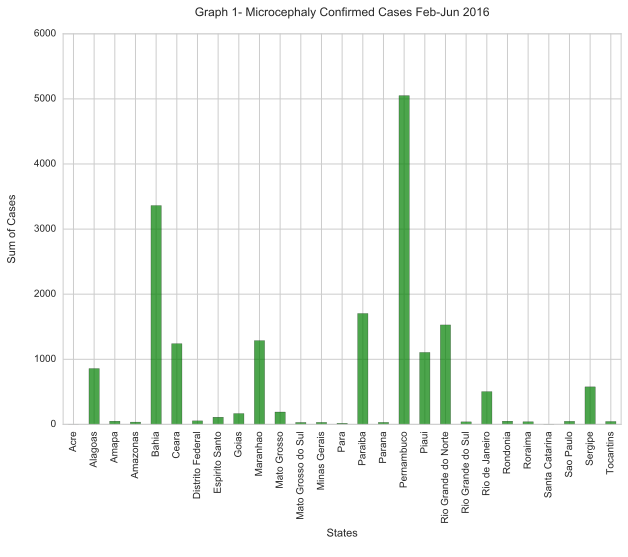

In [7]:
#####################
## total micro cases
####################
grouped = brazil_zika.groupby(['state_city'])
##
grouped_val_1 = grouped['microcephaly_confirmed']
category_group_1=grouped_val_1.sum()

# category_group_1
# print "+++++++++"
fig = plt.figure(figsize=(10,7))
braz_microc_conf_1 = category_group_1.plot(kind='bar', color='green', alpha=0.7, 
                                           title= "Graph 1- Microcephaly Confirmed Cases Feb-Jun 2016\n")
braz_microc_conf_1.set_xlabel("States\n")
braz_microc_conf_1.set_ylabel("Sum of Cases\n")
fig.savefig('../zika_analysis_graphs/graph1_microfeb_jun.pdf') 
plt.show()



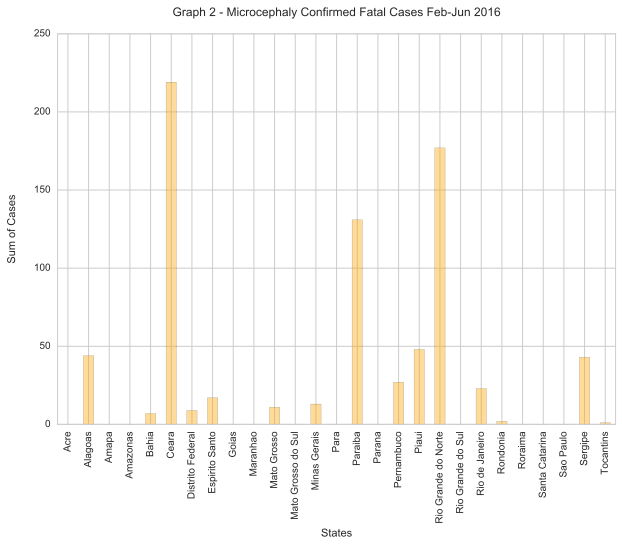

In [8]:
############################################
## total micro fatal cases by State
############################################
grouped_val_2 = grouped['microcephaly_fatal_confirmed']
category_group_2=grouped_val_2.sum()

# print category_group_2
# print "++++++++"

fig = plt.figure(figsize=(10,7))
braz_microc_conf_2 = category_group_2.plot(kind='bar', color='orange', alpha=0.4, 
                                           title= "Graph 2 - Microcephaly Confirmed Fatal Cases Feb-Jun 2016\n")
braz_microc_conf_2.set_xlabel("States\n")
braz_microc_conf_2.set_ylabel("Sum of Cases\n")
fig.savefig('../zika_analysis_graphs/graph2_micro_fatalfeb_jun.pdf')
plt.show()

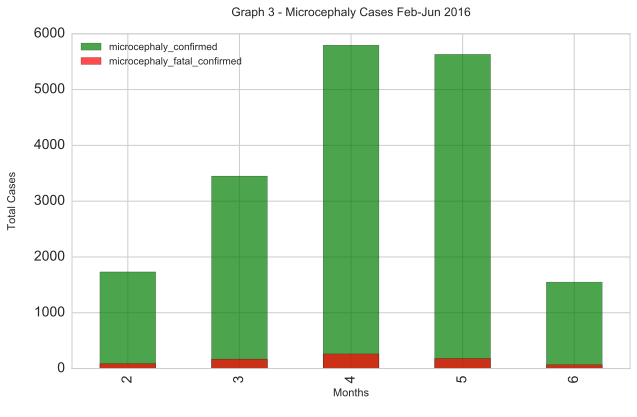

In [9]:
############################################
## total micro and micro fatal cases by month
############################################
grouped = brazil_zika.groupby(['month'])
##
grouped_val = grouped['microcephaly_confirmed']
category_group=grouped_val.sum()
#
grouped_val_1 = grouped['microcephaly_fatal_confirmed']
category_group_1=grouped_val_1.sum()


fig = plt.figure(figsize=(10,6))
braz_graph= category_group.plot(kind='bar', color='green', alpha=0.7, 
                                title= "Graph 3 - Microcephaly Cases Feb-Jun 2016\n", label="microcephaly_confirmed")
braz_graph_1= category_group_1.plot(kind='bar', color='red', alpha=0.7)

braz_graph.set_xlabel("Months\n")
braz_graph.set_ylabel("Total Cases\n")
plt.tick_params(labelsize=14)
plt.legend(loc='upper left')
fig.savefig('../zika_analysis_graphs/graph3_micro_combined_month.pdf')
plt.show()

In [10]:
def plot_num_ts(num, seq):
    
    num = num.sort_index(ascending = False)
    num = num.resample(seq).sum()
    mask = np.isfinite(num['microcephaly_confirmed'])
    fig = plt.figure(figsize=(10,5))
    ax = fig.gca()
    ax.plot(num['microcephaly_confirmed'][mask], c='y', lw=3, linestyle='dashed', marker='o',
                markerfacecolor='red', markersize=5,
            label="Graph 4: Brazil - number of microcephaly confirmed cases (Feb-Jun 2016) per %s"%seq)
    plt.legend(loc='best')
    
    plt.xlabel('\nTime progression in %s'%seq)
    plt.ylabel("Microcephaly confirmed cases\n")
    fig.savefig('../zika_analysis_graphs/graph4_micro_rate.pdf')
    plt.show()

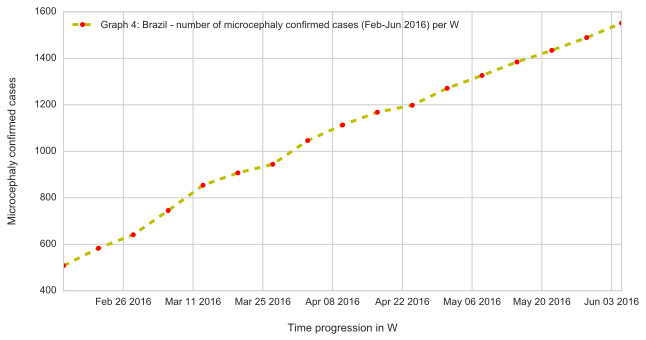

In [11]:
plot_num_ts(brazil_zika, "W")

#### b) Climate data

Various reports have linked the rising of temperatures and deforestation with an increase of the mosquitoes that carry the Zika virus. This suggests that the warmer it gets, the more efficiently the Aedes aegypti mosquito (the one that carries Zika, dengue fever, and other diseases) can transmit the illness; therefore, rapidly spreading the disease (Associated Press, 2016; Carlson, Dougherty, & Getz, 2016). Moreover, climate change and mosquito-borne illness have been linked with temperatures ranging from 61F and 100F (Githeko, Lindsay, Confalonieri, & Patz, 2000). 

To capture the effect of temperature changes on the development of microcephaly confirmed cases related to Zika, and considering that the collected microcephaly reported cases are from February 2016 to the first week of June 2016. I collected weather variables from at least 9 months before February 2016. In doing this, the possibility of pregnant women being infected with Zika - due to climate changes - before and during their pregnancy period is being addressed.  
In this manner, the weather data comes from 126 stations from January 1st, 2015 to June 6, 2016. From each station the following measurements were selected:

* **tmpf** = Air Temperature in Fahrenheit, typically @ 2 meters
* **dwpf** = Dew Point Temperature in Fahrenheit, typically @ 2 meters (dew point is a true measurement of the atmospheric moisture)
* **relh** = Relative Humidity in %
* **drct** = Wind Direction in degrees from north
* **sknt** = Wind Speed in knots
* **alti** = Pressure altimeter in inches

These stations are not evenly located among the states; in fact, some stations are positioned within states' borders, which makes it difficult to assign them (by location) to a state. To address this and to have a better approximation of weather measurements, I aggregated each station measurement by the mean and month. Graph 5 shows the distribution of the average temperature, where at around 80 degrees Fahrenheit we see the highest temperature pick. Similarly, the average dew point presents its global maxima at around 72 degrees Fahrenheit (graph 5), and the average relative humidity presents its peak at around 77% (graph 6).

To make the weather measurements more accurate I use the geopy package  and calculated the distance between all the stations and the different states in 100 kilometers terms. This calculation is the previous step to facilitated the computation of the decayed distance between the sates and the stations {1/ e^(distance between the states)}. The decayed distance is a weight that shrinks a value (distance) the further away the station and the state are, which I use to adjust the contribution of a weather measurement from a station to the state. 

More details on how the data was cleaned can be found in the following notebooks:
1. Brazil_weather_master.ipynb
2. brazil_geo_data.ipynb

In [12]:
######################################
## Measurement Calculations
######################################
def calc_station_stats(df):
    for c in [c_ for c_ in df.columns if c_ not in ['lat','lon','station']]:
        df[c+'_mean'] = np.mean(df[c].values)
        df[c+'_median'] = np.median(df[c].values)
        df[c+'_max'] = np.max(df[c].values)
        df[c+'_min'] = np.min(df[c].values)
        df[c+'_std'] = np.std(df[c].values)
        df.drop([c], axis=1, inplace=True)
    df['lat'] = df.lat.values[0]
    df['lon'] = df.lon.values[0]
    df.drop_duplicates(inplace=True)
    return df

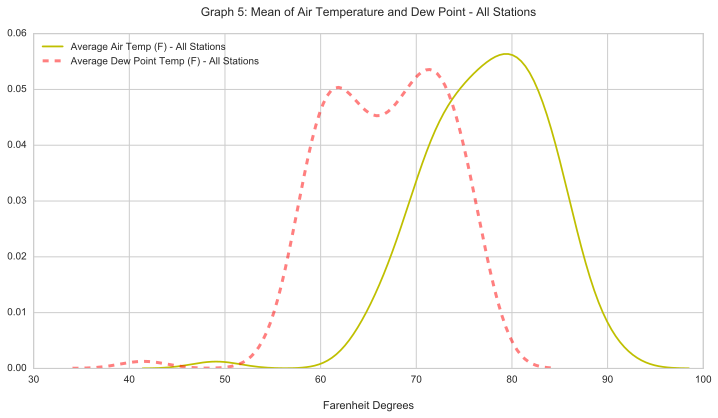

In [13]:
f = open('X_filled_agg.save', 'rb')
X_filled_agg = cPickle.load(f)
f.close()

fig, plot_regions = plt.subplots(figsize=(12, 6))
sns.distplot(X_filled_agg.tmpf_mean, 
             bins=6, color='y', hist=False, label='Average Air Temp (F) - All Stations')

sns.distplot(X_filled_agg.dwpf_mean, 
             bins=6, hist=False, label='Average Dew Point Temp (F) - All Stations',
            kde_kws={"color": "r", "lw": 3, "label": "KDE", 'alpha':0.5, 'ls':'--'})


plt.title("Graph 5: Mean of Air Temperature and Dew Point - All Stations\n")
plt.xlabel("\nFarenheit Degrees")
plt.show()
fig.savefig('../zika_analysis_graphs/graph5_temp_dewpoint_allstations.pdf') 

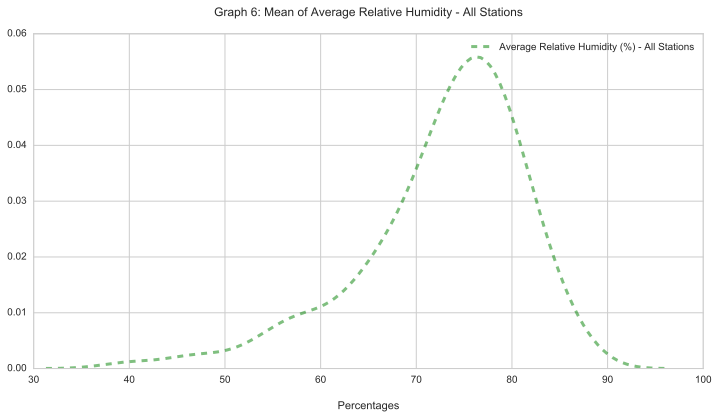

In [14]:
fig, plot_regions = plt.subplots(figsize=(12, 6))
sns.distplot(X_filled_agg.relh_mean, 
             bins=6, hist=False, label='Average Relative Humidity (%) - All Stations',
            kde_kws={"color": "g", "lw": 3, "label": "KDE", 'alpha':0.5, 'ls':'--'})

plt.title("Graph 6: Mean of Average Relative Humidity - All Stations\n")

plt.xlabel("\nPercentages")
plt.show()
fig.savefig('../zika_analysis_graphs/graph6_relat_humidity_allstations.pdf')

In [15]:
f = open('brazil_weather.save', 'rb')
brazil_weather = cPickle.load(f)
f.close()

def float_mapper(x):
    try:
        return float(x)
    except:
        return np.nan

for c in ['lon','lat','tmpf','dwpf','relh','drct','sknt','p01i','alti']:
    brazil_weather[c] = brazil_weather[c].map(float_mapper)
    
brazil_weather.rename(columns={'valid':'measurement_date'}, inplace=True)
brazil_weather['measurement_date'] = pd.to_datetime(brazil_weather.measurement_date)

print np.min(brazil_weather.measurement_date), np.max(brazil_weather.measurement_date)

####################
## Resampled by Month
####################
bwm = brazil_weather.copy()
bwm.index = brazil_weather.measurement_date
bwm.drop(['measurement_date'], axis=1, inplace=True)
bwm = bwm.groupby([pd.TimeGrouper('M'), 'station']).agg(np.nanmean)
bwm.reset_index(inplace=True)
#bwm.head(2)


bwm.measurement_date.value_counts()


bwm['2015'] = bwm.measurement_date.dt.year.map(lambda x: 1 if x == 2015 else 0)
bwm['2016'] = bwm.measurement_date.dt.year.map(lambda x: 1 if x == 2016 else 0)
bwm['month'] = bwm.measurement_date.dt.month
month_names = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
for m in bwm.month.unique():
    bwm[month_names[m-1]] = bwm.month.map(lambda x: 1 if x == m else 0)

2015-01-01 00:00:00 2016-06-09 23:45:00


//anaconda/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


In [16]:
################################
## Unique Stations match to cities
###################################
weather_unique = bwm[['station','lon','lat']]

# there were some longitude and latitude values that were slightly different by station so i just took the first one
def fix_lon_lat(df):
    df['lon'] = df.lon.values[0]
    df['lat'] = df.lat.values[0]
    return df

weather_unique = weather_unique.groupby('station').apply(fix_lon_lat).reset_index(drop=True)

weather_unique.drop_duplicates(inplace=True)
# print weather_unique.shape

In [17]:
# weather_unique.cart_key.value_counts()

In [18]:
import geopy
locations['cart_key'] = 1
weather_unique['cart_key'] = 1


In [19]:
# using this car_key variable, i can merge the stations with the states - all combinations of both
states_stations = locations.merge(weather_unique, on='cart_key')

In [20]:
states_stations.drop(['cart_key'], axis=1, inplace=True)

In [21]:
########################
## Distance Calculation
########################

# this calculates the distance between all the stations and the different cities. 
# i use the geopy package that does this for us with an apply function
from geopy.distance import vincenty
def distance_calculator(df):
    dist = (vincenty((df.latitude, df.longitude), (df.lat, df.lon)).km)/100.
    return dist

# i also put it in terms of 100 kilometers instead of just 1 kilometer
states_stations['dist_100km'] = states_stations.apply(distance_calculator, axis=1)

In [22]:
# the "decayed distance" between the cities and the stations is 1./e^(distance between the city)
# to the station. It's really a weight, because the further away the two are the number shrinks 
# exponentially. This will be used to adjust the contribution of a weather measurement from a station
# to a city
def decay_calculator(df):
    df['decayed_distance'] = 1./np.exp(df.dist_100km)
    return df

states_stations = states_stations.groupby('state_city', as_index=False).apply(decay_calculator).reset_index(drop=True)


In [23]:
states_stations.head(2)

state_city        latitude       longitude station      lon      lat  \
0       Acre  -9.30872154236  -70.4464645386    SBAA -49.2833  -8.2500   
1       Acre  -9.30872154236  -70.4464645386    SBAF -43.3847 -22.8751   

   dist_100km  decayed_distance  
0   23.310464      7.523050e-11  
1   32.519051      7.536255e-15

In [24]:
state_stations_dist = states_stations[['state_city','station','decayed_distance']]

In [25]:
bz = brazil_zika.reset_index(drop=False)

In [26]:
bz.rename(columns={'index':'measurement_date'}, inplace=True)

In [27]:
bz.measurement_date = pd.to_datetime(bz.measurement_date)

In [28]:
bwm.index = bwm.measurement_date

In [29]:
bwm.reset_index(drop=True, inplace=True)

In [30]:
bwm = bwm[['measurement_date', 'station','lon', 'lat', 'tmpf', 'dwpf', 'relh', 'drct', 'sknt', 'alti']]

In [31]:
# this basically adds columns for the different weather measurements so that there is one of the multiple
# weather measurements for each month
def month_weather_expander(d):
    ndf = pd.DataFrame({'station':[d.station.values[0]]})
    for md in d.measurement_date:
        year = md.year
        month = md.month
        for col in [c for c in d.columns if not c in ['measurement_date','station']]:
            ndf['_'.join([str(year), str(month), col])] = d.ix[d.measurement_date == md, col].values[0]
    return ndf
    

bwm.sort_values(['station','measurement_date'], inplace=True, ascending=True)
bwm_wide = bwm.groupby('station').apply(month_weather_expander).reset_index(drop=True)

In [32]:
print bz.shape
print bwm_wide.shape

(459, 8)
(126, 145)


In [33]:
##################################
### Brazil Weather by Month and stations
##################################
bwm_wide.head(2)

2015_10_alti  2015_10_drct  2015_10_dwpf  2015_10_lat  2015_10_lon  \
0     29.865611     94.298643     69.873303      -8.2500     -49.2833   
1     29.990836    157.200577     65.941739     -22.8751     -43.3847   

   2015_10_relh  2015_10_sknt  2015_10_tmpf  2015_11_alti  2015_11_drct  \
0     45.996018      6.230769     95.447964     29.842919    143.891892   
1     71.832928      5.272727     76.554559     29.884984    176.138280   

    ...     2016_5_tmpf  2016_6_alti  2016_6_drct  2016_6_dwpf  2016_6_lat  \
0   ...       92.975000    29.914098   136.229508    73.547541     -8.2500   
1   ...       71.107914    29.929353   212.941176    65.681176    -22.8751   

   2016_6_lon  2016_6_relh  2016_6_sknt  2016_6_tmpf  station  
0    -49.2833    59.249016     3.836066    90.780328     SBAA  
1    -43.3847    84.182294     4.235294    71.049412     SBAF  

[2 rows x 145 columns]

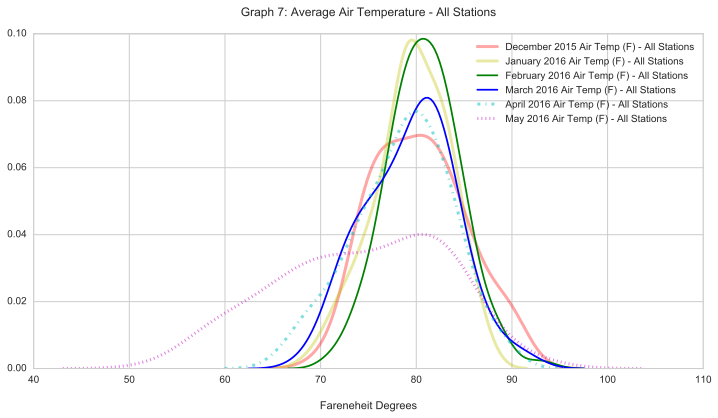

In [34]:
################################
## Wet Season 
################################

fig, plot_regions = plt.subplots(figsize=(12, 6))


sns.distplot(bwm_wide['2015_12_tmpf'], 
             bins=6, hist=False, label='December 2015 Air Temp (F) - All Stations',
            kde_kws={"color": "r", "lw": 3, "label": "KDE", 'alpha':0.35})

sns.distplot(bwm_wide['2016_1_tmpf'], 
             bins=6, hist=False, label='January 2016 Air Temp (F) - All Stations',
            kde_kws={"color": "y", "lw": 3, "label": "KDE", 'alpha':0.35})

sns.distplot(bwm_wide['2016_2_tmpf'], 
             bins=6, color='g', hist=False, label='February 2016 Air Temp (F) - All Stations')

sns.distplot(bwm_wide['2016_3_tmpf'], 
             bins=6, color='b', hist=False, label='March 2016 Air Temp (F) - All Stations')

sns.distplot(bwm_wide['2016_4_tmpf'], 
             bins=6, hist=False, label='April 2016 Air Temp (F) - All Stations',
            kde_kws={"color": "c", "lw": 3, "label": "KDE", 'alpha':0.5, 'ls':'-.'})

sns.distplot(bwm_wide['2016_5_tmpf'], 
             bins=6, hist=False, label='May 2016 Air Temp (F) - All Stations',
            kde_kws={"color": "m", "lw": 3, "label": "KDE", 'alpha':0.5, 'ls': ':'})


plt.title("Graph 7: Average Air Temperature - All Stations\n")

plt.xlabel("\nFareneheit Degrees")
plt.show()
fig.savefig('../zika_analysis_graphs/graph7_wet_season_air_temp.pdf')

In [35]:
bz_stations = bz.merge(state_stations_dist, on='state_city')

In [36]:
bz_stations = bz_stations.merge(bwm_wide, on='station')

In [37]:
print bz_stations.shape

(57834, 154)


In [38]:
# This cell says for all the columns not in the non-weather columns, multiply the column
# by the decayed distance measurement. Which, essesntially, is saying figure out
# the contribution of that station's measure ment to the current city's weather measurement
measure_cols = [c for c in bz_stations.columns if c not in ['measurement_date', 'country',
                                                   'state_city','microcephaly_confirmed',
                                                   'microcephaly_fatal_confirmed',
                                                   'year','month','day','station',
                                                   'decayed_distance']]

for mc in measure_cols:
    bz_stations.loc[:, mc] = bz_stations.loc[:, mc] * bz_stations.decayed_distance

In [39]:
bz_stations.drop(['decayed_distance','station'], axis=1, inplace=True)

groups = bz_stations.groupby(['measurement_date','country','state_city','microcephaly_confirmed',
                              'microcephaly_fatal_confirmed','year','month','day'])
bz_stations_wavg = groups.sum().reset_index()

In [40]:
def zika_measurement_expander(d):
    ndf = pd.DataFrame({'state_city':[d.state_city.values[0]]})
    
    for month in d.month.unique():
        ndf['_'.join(['zika_micro',str(month)])] = np.sum(d[d.month == month].microcephaly_confirmed)
        ndf['_'.join(['zika_micro_fatal',str(month)])] = np.sum(d[d.month == month].microcephaly_fatal_confirmed)
    
    dsingle = d.iloc[[0],:]
    dsingle = ndf.merge(dsingle, on='state_city')
    dsingle.drop(['microcephaly_confirmed','microcephaly_fatal_confirmed',
                  'measurement_date','year','month','day'], axis=1)
    return dsingle
    

bz_stations_cityrow = bz_stations_wavg.groupby(['state_city']).apply(zika_measurement_expander).reset_index(drop=True)

In [41]:
##############################
### Brazil Weather, by state, month and microcephaly cases
##############################
print bz_stations_cityrow.shape
print "\n++++++++++++++\n"
bz_stations_cityrow.head(2)

(27, 162)

++++++++++++++



state_city  zika_micro_2  zika_micro_fatal_2  zika_micro_3  \
0       Acre             0                   0             0   
1    Alagoas            80                   6           156   

   zika_micro_fatal_3  zika_micro_4  zika_micro_fatal_4  zika_micro_5  \
0                   0             1                   0             0   
1                  11           278                  15           271   

   zika_micro_fatal_5  zika_micro_6     ...       2016_5_sknt 2016_5_tmpf  \
0                   0             0     ...          1.306530   29.521957   
1                   9            73     ...          6.678984   82.383271   

  2016_6_alti  2016_6_drct  2016_6_dwpf  2016_6_lat  2016_6_lon  2016_6_relh  \
0   10.972981    71.426822    27.151580   -3.055309  -25.861634    30.280945   
1   31.031851   135.994554    73.797923   -9.623057  -37.831771    82.387582   

   2016_6_sknt  2016_6_tmpf  
0     1.318962    29.458938  
1     5.923150    82.099532  

[2 rows x 162 columns]

#### c) Population and urban characteristics data

The increase in urban migration and population growth, poses a risk for the expansion of the disease, especially in zones where inadequate sanitary conditions are present.  Furthermore, the likelihood of getting the disease through other ways different than a mosquito bite in areas where there is a higher population density is another concern. Sexually transmitted cases of Zika have been confirmed after the mosquito-borne Zika virus (ZIKV) was isolated from semen of men with Zika symptoms (E. Petersen et al., 2016). 

To my knowledge, there aren’t public records of Zika instances transmitted via sex or archives of how pregnant women acquired the disease. The only public registers found are related to the reported number of microcephaly confirmed cases. Additionally, official numbers of newborn children per month and by states during February to June 2016 (the period of this study) are not available. These pose yet, another challenge in the construction of datasets. 

I filled these gaps by using the projected population by state and month released by the Instituto Brasileiro de Geografia e Estatística. Using these numbers, I calculated the total number of men and women at a reproductive age (15-44) for 2015 and 2016, and the total population numbers for both years.  Then I proceeded to calculate the population density for each year and state by dividing the total population to its correspondent state area. 

On the other hand, to control for reporting errors that could potentially be double counting or missing reported cases, I used the prevalence rate calculation of microcephaly cases for each month by 10,000 children. These rates provide a snapshot of how much microcephaly cases are present in a population group at a single point in time (Missouri Department of Health and Senior Services, 2015). Ideally, in the calculation of these rates, I will have to include the sum of newborn children in 2016 at a given month as the denominator; but there are not official numbers of newborn babies. I filled these gap by first calculating the percentage of children ages 0 to 4 for each state from the total population groups reported in the annual population projections. Then I used this percentage to obtain an estimated number of children present on each month and each state, using the total projected monthly populations.

Zika has been associated as part of the ‘diseases of poverty’ that are endemic in poor regions where lack of public health infrastructure allows illnesses to spread rapidly without significance resistance (Kruskal, 2016). In Brazil, where nearly 85 percent of the population is urban, sanitation has not expanded in the magnitude related to the population growth, especially concerning sewage and waste treatment systems, and piped water (Osava, 2016). Therefore, it still common to see open water containers located in rooftop cisterns, buckets and more, as a way to store water, and sewage running on the streets. These muddy and shoddy waters coupled with old tires and other debris are the perfect habitats for the mosquito and the spread of Zika, as it occurred in the cities of Recife and Salvador in northeastern Brazil (Gillis, 2016). To explain these issues, I am using the urban population numbers that have access to piped water, sewerage system, and garbage collection from the Brazilian 2010 demographic census data. Lastly, as a measurement of wealth among the Brazilian states I use the monthly per capita income by state in US dollars. 

More details on how the data was clean can be found in the following notebook:
1. brazil_demographics_deforestation.ipynb


In [42]:
####################################
## 2015 population
##################################
f = open('pop2015.save', 'rb')
pop2015 = cPickle.load(f)
f.close()
pop2015.head(2)

state_city  men2015_15-44  women2015_15-44  tot_men_women2015
0       Acre       199932.0         195863.0           803513.0
1    Alagoas       792350.0         834762.0          3340502.0

In [43]:
####################################
## 2016 population
##################################
f = open('pop2016.save', 'rb')
pop2016 = cPickle.load(f)
f.close()
pop2016.head(2)

state_city  men2016_15-44  women2016_15-44  tot_men_women2016  \
0       Acre       204141.0         200057.0           816687.0   
1    Alagoas       797122.0         841628.0          3358527.0   

   tot2016_0-4_perc  
0         10.418802  
1          8.446084

In [44]:
####################################
## 2016 population by month
##################################
f = open('pop_month2016.save', 'rb')
pop_month2016 = cPickle.load(f)
f.close()
pop_month2016.head(2)

state_city pop2016_feb pop2016_march pop2016_apr pop2016_may pop2016_june
1   Rondonia     1779600       1781187     1782770     1784349      1785924
2       Acre      810965        812061      813156      814249       815340

In [45]:
####################################
## Merging 2016 populations
##################################
bz_perct = pop2016.merge(pop_month2016, on='state_city')
bz_perct['child_0-4_feb2016'] = (bz_perct['tot2016_0-4_perc']*bz_perct['pop2016_feb'])/100
bz_perct['child_0-4_march2016'] = (bz_perct['tot2016_0-4_perc']*bz_perct['pop2016_march'])/100
bz_perct['child_0-4_apr2016'] = (bz_perct['tot2016_0-4_perc']*bz_perct['pop2016_apr'])/100
bz_perct['child_0-4_may2016'] = (bz_perct['tot2016_0-4_perc']*bz_perct['pop2016_may'])/100
bz_perct['child_0-4_jun2016'] = (bz_perct['tot2016_0-4_perc']*bz_perct['pop2016_june'])/100

In [46]:
####################################
## Final 2016 populations columns needed 
##################################
pop2016_pct = bz_perct[['state_city', 'men2016_15-44', 'women2016_15-44', 'tot_men_women2016',
                       'child_0-4_feb2016', 'child_0-4_march2016', 'child_0-4_apr2016', 'child_0-4_may2016',
                        'child_0-4_jun2016']]
pop2016_pct.head(2)

state_city  men2016_15-44  women2016_15-44  tot_men_women2016  \
0       Acre       204141.0         200057.0           816687.0   
1    Alagoas       797122.0         841628.0          3358527.0   

  child_0-4_feb2016 child_0-4_march2016 child_0-4_apr2016 child_0-4_may2016  \
0           84492.8               84607           84721.1             84835   
1            283052              283178            283304            283429   

  child_0-4_jun2016  
0           84948.7  
1            283553

In [47]:
####################################
## Urban Characteristics
##################################
f = open('brazil_areas.save', 'rb')
brazil_areas = cPickle.load(f)
f.close()
brazil_areas.head(2)

state_city      capital region   area_km_2  percap_inc_month  \
0   Rondonia  Porto Velho  north  237590.543        240.350877   
1       Acre   Rio Branco  north  164123.739        219.883041   

   migration_index_2009  water_supply  toilett_sewarage  garbage_collection  
0                0.0307        558011           1112057             1061417  
1                0.0013        309268            494967              480224

In [48]:
##################################
## Changing Reis to US dollar
# 1 USD = 3.42 reals
##################################
brazil_areas['percap_inc_month'] = (brazil_areas['percap_inc_month']/3.42)

In [49]:
########################################
## Merging populations demographic data
#######################################
print pop2015.shape, pop2016_pct.shape, brazil_areas.shape
brazil_pre_clean = pop2015.merge(pop2016_pct, on='state_city')
brazil_pre_clean = brazil_pre_clean.merge(brazil_areas, on='state_city')
print brazil_pre_clean.shape
brazil_pre_clean.head(2)

(27, 4) (27, 9) (27, 9)
(27, 20)


state_city  men2015_15-44  women2015_15-44  tot_men_women2015  \
0       Acre       199932.0         195863.0           803513.0   
1    Alagoas       792350.0         834762.0          3340502.0   

   men2016_15-44  women2016_15-44  tot_men_women2016 child_0-4_feb2016  \
0       204141.0         200057.0           816687.0           84492.8   
1       797122.0         841628.0          3358527.0            283052   

  child_0-4_march2016 child_0-4_apr2016 child_0-4_may2016 child_0-4_jun2016  \
0               84607           84721.1             84835           84948.7   
1              283178            283304            283429            283553   

      capital     region   area_km_2  percap_inc_month  migration_index_2009  \
0  Rio Branco      north  164123.739         64.293287                0.0013   
1      Maceio  northeast   27848.003         51.126842               -0.2953   

   water_supply  toilett_sewarage  garbage_collection  
0        309268            494967              480224  
1       1803606           2214305             2163464

In [50]:
# Population density calculation
brazil_pre_clean['pop_dens_2015'] = (brazil_pre_clean['tot_men_women2015']/brazil_pre_clean['area_km_2'])
brazil_pre_clean['pop_dens_2016'] = (brazil_pre_clean['tot_men_women2016']/brazil_pre_clean['area_km_2'])

In [51]:
brazil_pre_clean = brazil_pre_clean[['state_city', 'men2015_15-44', 'women2015_15-44', 'men2016_15-44', 
'women2016_15-44', 'child_0-4_feb2016', 'child_0-4_march2016', 'child_0-4_apr2016', 
'child_0-4_may2016', 'child_0-4_jun2016', u'capital', u'region', u'area_km_2', u'percap_inc_month', 
u'migration_index_2009', u'water_supply', u'toilett_sewarage', u'garbage_collection', 'pop_dens_2015', 
'pop_dens_2016']]

In [52]:
################################################
## Merging Zika, weather and population datasets 
## This is the data set for statistical analysis
###############################################
print "Shapes of datasets before statistical analysis:"
print brazil_pre_clean.shape, bz_stations_cityrow.shape
brazil_clean = brazil_pre_clean.merge(bz_stations_cityrow, on='state_city')
print "\nShape of data for analysis:"
print brazil_clean.shape

Shapes of datasets before statistical analysis:
(27, 20) (27, 162)

Shape of data for analysis:
(27, 181)


In [53]:
###########################
## Lat and lon columns have the same values, 
## I am keeping only 4 for of them 
##########################
brazil_clean['2015long'] = brazil_clean['2015_1_lon']
brazil_clean['2015lati'] = brazil_clean['2015_1_lat']
brazil_clean['2016long'] = brazil_clean['2016_1_lon']
brazil_clean['2016lati'] = brazil_clean['2016_1_lat']

In [54]:
##### Removing lat and lon columns
for col in brazil_clean:
    if '_lat' in col:
        try:
            brazil_clean.drop(col, axis=1, inplace=True)
        except Exception:
            pass
        
    if '_lon' in col:
        try:
            brazil_clean.drop(col, axis=1, inplace=True)
        except Exception:
            pass

In [55]:
#############################
### These columns are not neccesary in the analysis
#############################
brazil_clean.drop('month', axis=1, inplace=True)
brazil_clean.drop('year', axis=1, inplace=True)
brazil_clean.drop('measurement_date', axis=1, inplace=True)
brazil_clean.drop('microcephaly_confirmed', axis=1, inplace=True)
brazil_clean.drop('microcephaly_fatal_confirmed', axis=1, inplace=True)
brazil_clean.drop('day', axis=1, inplace=True)

In [56]:
############################
## Total Microcephly cases ##
## Excludes june as there are not full report for this month yet
############################
total_micro = (brazil_clean['zika_micro_2'] + brazil_clean['zika_micro_3'] + brazil_clean['zika_micro_4']+
                             brazil_clean['zika_micro_5'])
# + brazil_clean['zika_micro_6']

############################
## Total Microcephly Fattal cases ##
## Excludes june as there are not full report for this month
############################
tot_micro_fatal = (brazil_clean['zika_micro_fatal_2'] + brazil_clean['zika_micro_fatal_3'] +
                                   brazil_clean['zika_micro_fatal_4']+ brazil_clean['zika_micro_fatal_5'])
# + brazil_clean['zika_micro_fatal_6']

############################
# Adding columns to dataframe
#########################
brazil_clean['tot_micro'] = total_micro
brazil_clean['tot_micro_fatal'] = tot_micro_fatal

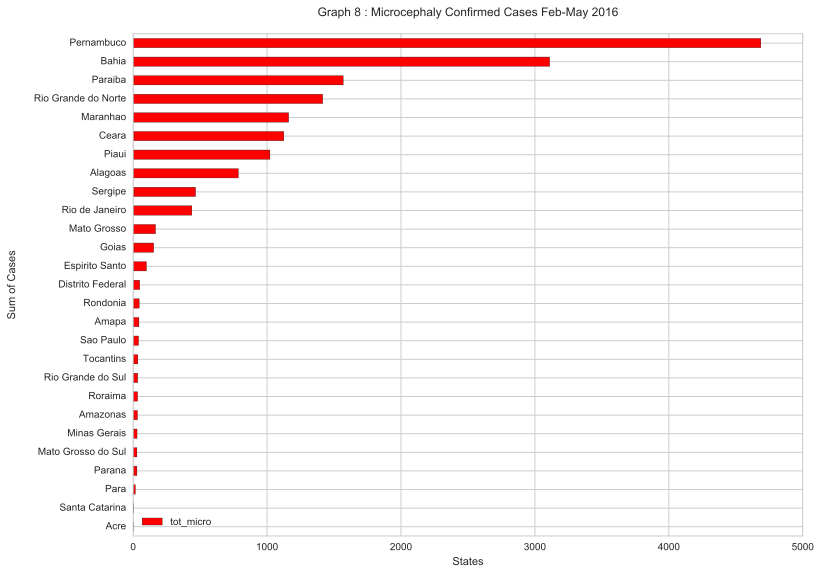

In [57]:
#################
## total micro cases
################
fig = plt.figure(figsize=(10,6))
braz_microc_conf = brazil_clean.groupby('state_city').sum().reset_index().sort_values(by='tot_micro', 
                    ascending=True).plot(x='state_city', y='tot_micro', kind='barh', figsize=(12,9), color='r',
                                        title= "Graph 8 : Microcephaly Confirmed Cases Feb-May 2016\n")
braz_microc_conf.set_xlabel("States\n")
braz_microc_conf.set_ylabel("Sum of Cases\n")
plt.legend(loc='best')
fig.savefig('../zika_analysis_graphs/graph8_micro_feb_june.pdf')
plt.show()  

In [58]:
###########################
# Prevalence of microcephaly disease cases by month and state per 10,000 children in population 0 to 4
##########################
brazil_clean['preva_micro_2'] = ((brazil_clean['zika_micro_2']/brazil_clean['child_0-4_feb2016'])*10000)
brazil_clean['preva_micro_3'] = ((brazil_clean['zika_micro_3']/brazil_clean['child_0-4_march2016'])*10000)
brazil_clean['preva_micro_4'] = ((brazil_clean['zika_micro_4']/brazil_clean['child_0-4_apr2016'])*10000)
brazil_clean['preva_micro_5'] = ((brazil_clean['zika_micro_5']/brazil_clean['child_0-4_may2016'])*10000)
## brazil_clean['rate_micro_6'] = (brazil_clean['zika_micro_6']/brazil_clean['child_0-4_jun2016'])*10000


In [59]:
############################
## Growth rate calculation
## Each month i.e. zika_micro_3 represents the number of cases reported in that month, These cases are not cumulative,
## Meaning the number reported in March does not include the number reported in February
############################
brazil_clean['rate_micro_3_2'] = ((brazil_clean['zika_micro_3']*100)/brazil_clean['zika_micro_2'])-100
brazil_clean['rate_micro_4_3'] = ((brazil_clean['zika_micro_4']*100)/brazil_clean['zika_micro_3'])-100
brazil_clean['rate_micro_5_4'] = ((brazil_clean['zika_micro_5']*100)/brazil_clean['zika_micro_4'])-100
## brazil_clean['rate_micro_6_5'] = ((brazil_clean['zika_micro_6']*100)/brazil_clean['zika_micro_5'])-100
## brazil_clean['rate_micro_5_2'] = ((brazil_clean['zika_micro_5']*100)/brazil_clean['zika_micro_2'])-100

In [60]:
############################
## Growth rate calculation/replacing NaN =0 and inf=100  
## NaN, if there were no cases the month before and no cases in the month after, then there is 0 increase
## inf, if there no cases in the month before and now there are cases, then there is a 100% increase
############################
brazil_clean['rate_micro_3_2'].fillna(0, inplace=True)
brazil_clean['rate_micro_3_2'].replace(np.inf, 100, inplace=True)

brazil_clean['rate_micro_4_3'].fillna(0, inplace=True)
brazil_clean['rate_micro_4_3'].replace(np.inf, 100, inplace=True)

brazil_clean['rate_micro_5_4'].fillna(0, inplace=True)
brazil_clean['rate_micro_5_4'].replace(np.inf, 100, inplace=True)

In [61]:
############################
## Growth rate calculation/replacing NaN =0 and inf=100  
## NaN, if there were no cases the month before and no cases in the month after, then there is 0 increase
## inf, if there no cases in the month before and now there are cases, then there is a 100% increase
############################
brazil_clean['rate_micro_3_2'].fillna(0, inplace=True)
brazil_clean['rate_micro_3_2'].replace(np.inf, 100, inplace=True)

brazil_clean['rate_micro_4_3'].fillna(0, inplace=True)
brazil_clean['rate_micro_4_3'].replace(np.inf, 100, inplace=True)

brazil_clean['rate_micro_5_4'].fillna(0, inplace=True)
brazil_clean['rate_micro_5_4'].replace(np.inf, 100, inplace=True)

brazil_clean['rate_micro_3_2'] = brazil_clean['rate_micro_3_2'].round(decimals=2)
brazil_clean['rate_micro_4_3'] = brazil_clean['rate_micro_4_3'].round(decimals=2)
brazil_clean['rate_micro_5_4'] = brazil_clean['rate_micro_5_4'].round(decimals=2)

In [62]:
############################
## Region, creating dummies
## northeast      value=2
## north          value=1
## center-west    value=4
## southeast      value=0
## south          value=3
############################
from sklearn import preprocessing
le_region = preprocessing.LabelEncoder()
brazil_clean.region = le_region.fit_transform(brazil_clean.region)

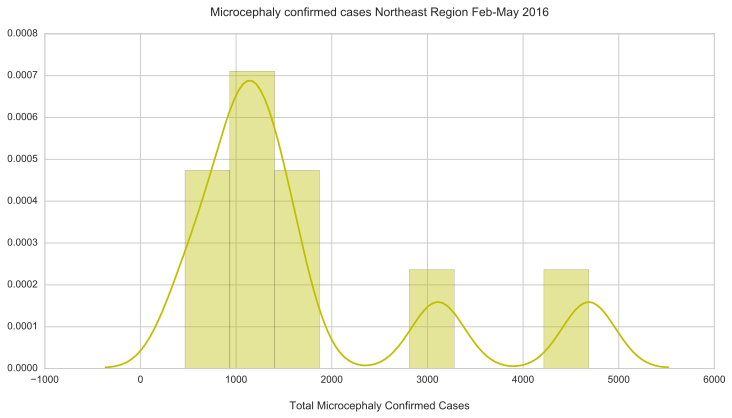

In [63]:
############################
## Microcephaly cases Northeast region
############################
fig, plot_regions = plt.subplots(figsize=(12, 6))

sns.distplot(brazil_clean[(brazil_clean['region']==2)].tot_micro, kde=True, 
             axlabel= "\nTotal Microcephaly Confirmed Cases", color='y')

plot_regions.set_title('Microcephaly confirmed cases Northeast Region Feb-May 2016\n')
plt.show()

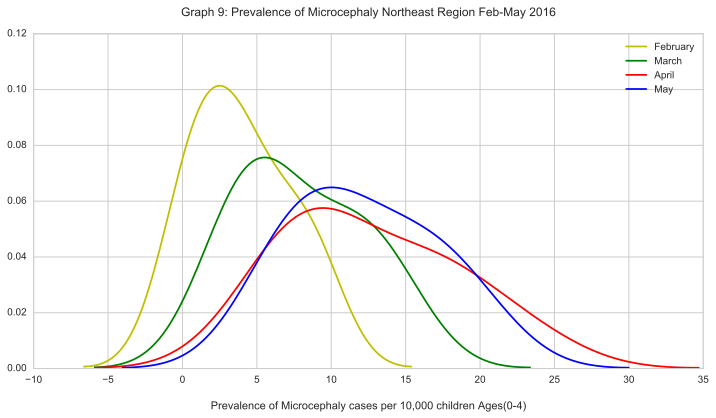

In [64]:
fig, plot_regions = plt.subplots(figsize=(12, 6))

sns.distplot(brazil_clean[(brazil_clean['region']==2)].preva_micro_2, 
             bins=6, color='y', hist=False, label='February')

sns.distplot(brazil_clean[(brazil_clean['region']==2)].preva_micro_3, 
             bins=6, color='g', hist=False, label='March')

sns.distplot(brazil_clean[(brazil_clean['region']==2)].preva_micro_4, 
             bins=6, color='r', hist=False, label='April')

sns.distplot(brazil_clean[(brazil_clean['region']==2)].preva_micro_5, 
             bins=6, color='b', hist=False, label='May', 
            axlabel= "\nPrevalence of Microcephaly cases per 10,000 children Ages(0-4)")

plot_regions.set_title('Graph 9: Prevalence of Microcephaly Northeast Region Feb-May 2016\n')
plt.show()
fig.savefig('../zika_analysis_graphs/graph9_north_east_prevalence.pdf') 

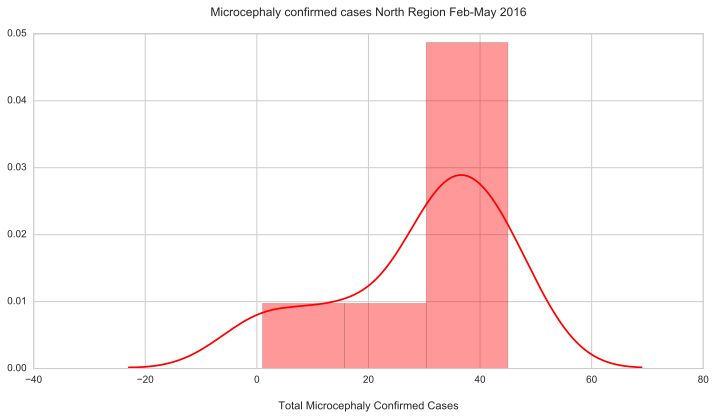

In [65]:
###########################
## Norht Region
###########################
fig, plot_regions = plt.subplots(figsize=(12, 6))

sns.distplot(brazil_clean[(brazil_clean['region']==1)].tot_micro, kde=True, 
             axlabel= "\nTotal Microcephaly Confirmed Cases", color='r')

plot_regions.set_title('Microcephaly confirmed cases North Region Feb-May 2016\n')
plt.show()

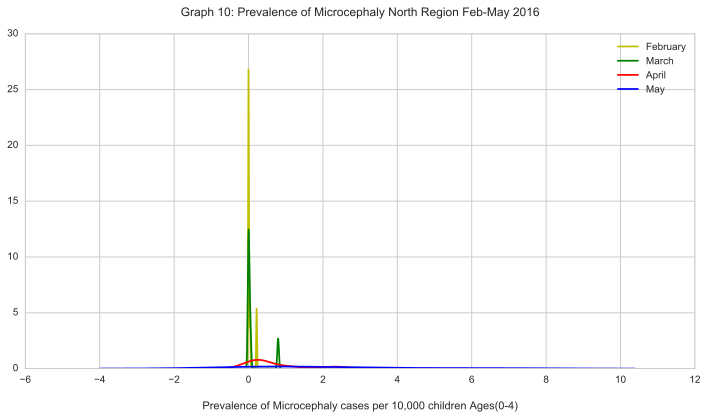

In [66]:
fig, plot_regions = plt.subplots(figsize=(12, 6))

sns.distplot(brazil_clean[(brazil_clean['region']==1)].preva_micro_2, 
             bins=6, color='y', hist=False, label='February')

sns.distplot(brazil_clean[(brazil_clean['region']==1)].preva_micro_3, 
             bins=6, color='g', hist=False, label='March')

sns.distplot(brazil_clean[(brazil_clean['region']==1)].preva_micro_4, 
             bins=6, color='r', hist=False, label='April')

sns.distplot(brazil_clean[(brazil_clean['region']==1)].preva_micro_5, 
             bins=6, color='b', hist=False, label='May', 
            axlabel= "\nPrevalence of Microcephaly cases per 10,000 children Ages(0-4)")

plot_regions.set_title('Graph 10: Prevalence of Microcephaly North Region Feb-May 2016\n')
plt.show()
fig.savefig('../zika_analysis_graphs/graph10_north_prevalence.pdf')

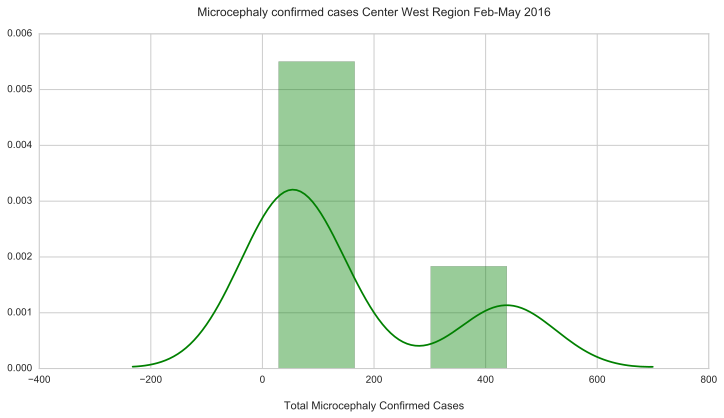

In [67]:
###########################
## Central West Region
###########################
fig, plot_regions = plt.subplots(figsize=(12, 6))

sns.distplot(brazil_clean[(brazil_clean['region']==4)].tot_micro, kde=True, 
             axlabel= "\nTotal Microcephaly Confirmed Cases", color='g')

plot_regions.set_title('Microcephaly confirmed cases Center West Region Feb-May 2016\n')
plt.show()

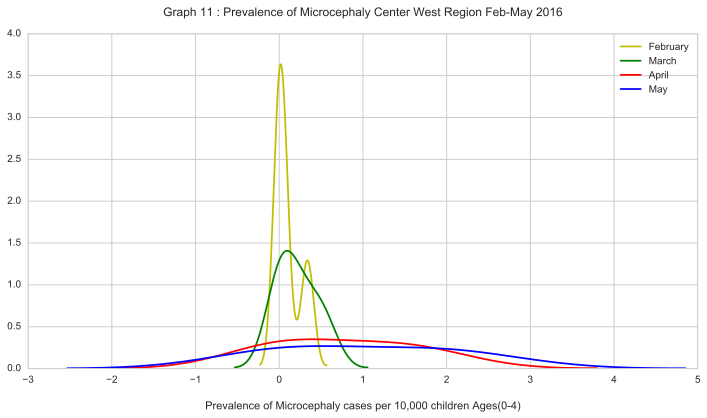

In [68]:
fig, plot_regions = plt.subplots(figsize=(12, 6))

sns.distplot(brazil_clean[(brazil_clean['region']==4)].preva_micro_2, 
             bins=6, color='y', hist=False, label='February')

sns.distplot(brazil_clean[(brazil_clean['region']==4)].preva_micro_3, 
             bins=6, color='g', hist=False, label='March')

sns.distplot(brazil_clean[(brazil_clean['region']==4)].preva_micro_4, 
             bins=6, color='r', hist=False, label='April')

sns.distplot(brazil_clean[(brazil_clean['region']==4)].preva_micro_5, 
             bins=6, color='b', hist=False, label='May', 
            axlabel= "\nPrevalence of Microcephaly cases per 10,000 children Ages(0-4)")

plot_regions.set_title('Graph 11 : Prevalence of Microcephaly Center West Region Feb-May 2016\n')
plt.show()
fig.savefig('../zika_analysis_graphs/graph11_center_west_prevalence.pdf')

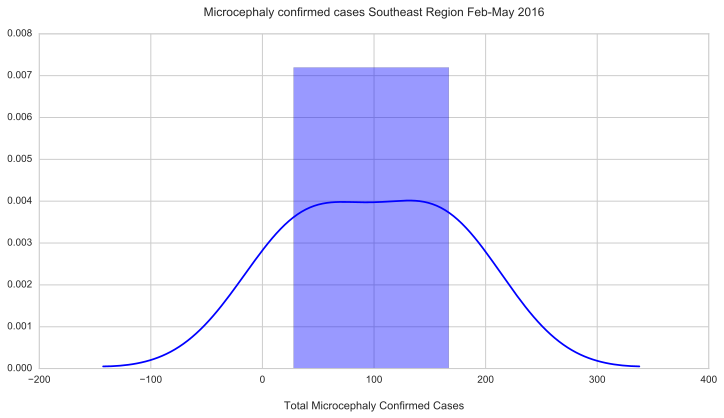

In [69]:
##############################
#### Southeast Region
##############################
fig, plot_regions = plt.subplots(figsize=(12, 6))

sns.distplot(brazil_clean[(brazil_clean['region']==0)].tot_micro, kde=True, 
             axlabel= "\nTotal Microcephaly Confirmed Cases", color='b')

plot_regions.set_title('Microcephaly confirmed cases Southeast Region Feb-May 2016\n')
plt.show()

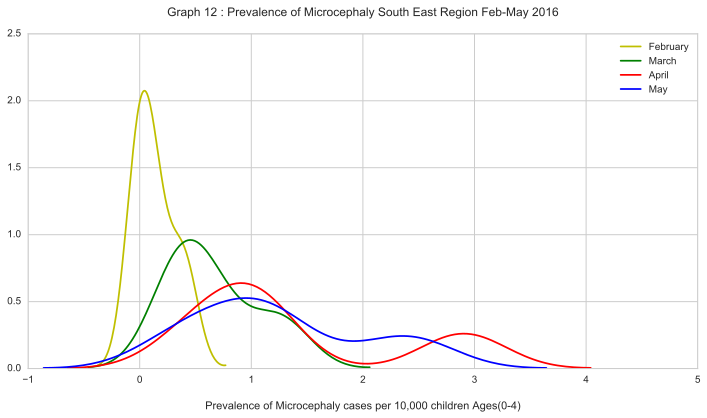

In [70]:
fig, plot_regions = plt.subplots(figsize=(12, 6))

sns.distplot(brazil_clean[(brazil_clean['region']==0)].preva_micro_2, 
             bins=6, color='y', hist=False, label='February')

sns.distplot(brazil_clean[(brazil_clean['region']==0)].preva_micro_3, 
             bins=6, color='g', hist=False, label='March')

sns.distplot(brazil_clean[(brazil_clean['region']==0)].preva_micro_4, 
             bins=6, color='r', hist=False, label='April')

sns.distplot(brazil_clean[(brazil_clean['region']==0)].preva_micro_5, 
             bins=6, color='b', hist=False, label='May', 
            axlabel= "\nPrevalence of Microcephaly cases per 10,000 children Ages(0-4)")

plot_regions.set_title('Graph 12 : Prevalence of Microcephaly South East Region Feb-May 2016\n')
plt.show()
fig.savefig('../zika_analysis_graphs/graph12_south_east_prevalence.pdf')

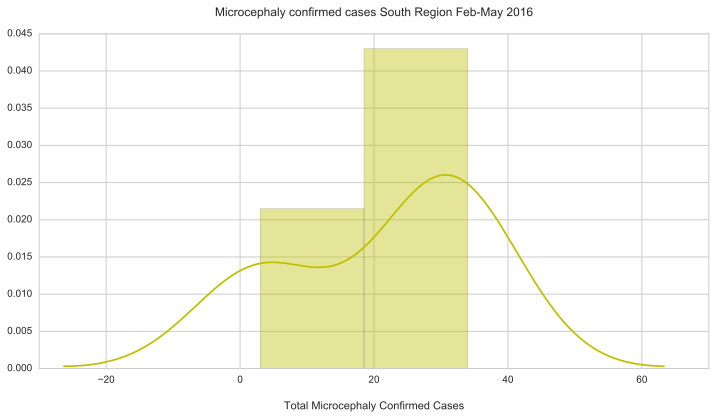

In [71]:
######################
## South Region
######################
fig, plot_regions = plt.subplots(figsize=(12, 6))

sns.distplot(brazil_clean[(brazil_clean['region']==3)].tot_micro, kde=True, 
             axlabel= "\nTotal Microcephaly Confirmed Cases", color='y')

plot_regions.set_title('Microcephaly confirmed cases South Region Feb-May 2016\n')
plt.show()

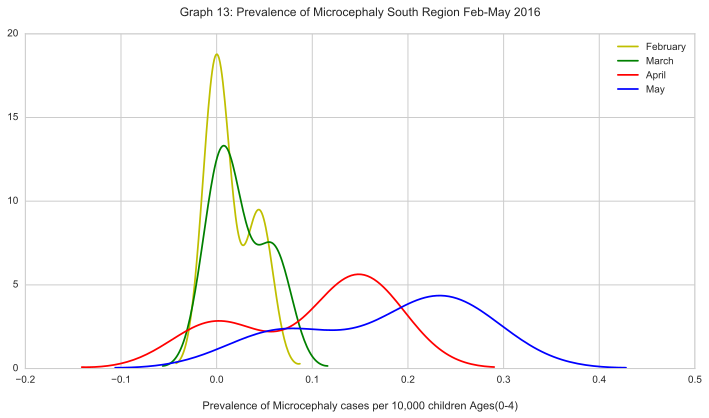

In [72]:
fig, plot_regions = plt.subplots(figsize=(12, 6))

sns.distplot(brazil_clean[(brazil_clean['region']==3)].preva_micro_2, 
             bins=6, color='y', hist=False, label='February')

sns.distplot(brazil_clean[(brazil_clean['region']==3)].preva_micro_3, 
             bins=6, color='g', hist=False, label='March')

sns.distplot(brazil_clean[(brazil_clean['region']==3)].preva_micro_4, 
             bins=6, color='r', hist=False, label='April')

sns.distplot(brazil_clean[(brazil_clean['region']==3)].preva_micro_5, 
             bins=6, color='b', hist=False, label='May', 
            axlabel= "\nPrevalence of Microcephaly cases per 10,000 children Ages(0-4)")

plot_regions.set_title('Graph 13: Prevalence of Microcephaly South Region Feb-May 2016\n')
plt.show()
fig.savefig('../zika_analysis_graphs/graph13_south_prevalence.pdf')

### 4.2 Statistical Analysis

In [73]:
#########
# I am not including weather data for june, the micro confirm and fatal cases by month and total as it will be double count
# and are already included in the prevalance calculations 
# I am also not including children 0-4 on each month
# Consider using 'zika_micro_2', 'zika_micro_3', 'zika_micro_4', 'zika_micro_5', as targets?
########
tar = 'tot_micro'

not_inlc = ['tot_micro', 'state_city', 'child_0-4_feb2016', 'child_0-4_march2016', 'child_0-4_apr2016', 'child_0-4_may2016', 
            'child_0-4_jun2016', u'capital', 'zika_micro_2', 'zika_micro_fatal_2', 'zika_micro_3',
            'zika_micro_fatal_3', 'zika_micro_4', 'zika_micro_fatal_4', 'zika_micro_5','zika_micro_fatal_5',
            'zika_micro_6', 'zika_micro_fatal_6', 'country', '2016_6_alti', '2016_6_drct', '2016_6_dwpf',
            '2016_6_relh', '2016_6_sknt', '2016_6_tmpf','tot_micro_fatal']

columns_ = brazil_clean

In [74]:
#########
# Defining Target and Predictors
########
target = brazil_clean[tar]
predictors = brazil_clean[[i for i in columns_ if i not in not_inlc]]
print target.shape, predictors.shape

(27,) (27, 126)


In [75]:
####################################
# Baseline
###################################
brazil_clean.tot_micro.describe()

count      27.000000
mean      615.222222
std      1085.548721
min         1.000000
25%        32.500000
50%        49.000000
75%       903.000000
max      4687.000000
Name: tot_micro, dtype: float64

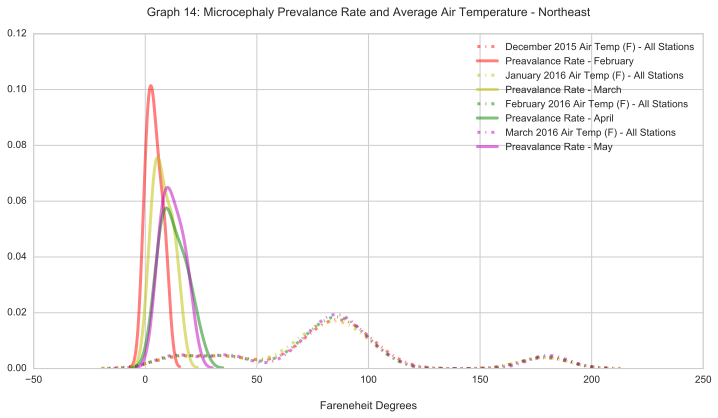

In [76]:
fig, plot_regions = plt.subplots(figsize=(12, 6))


sns.distplot(brazil_clean[(brazil_clean['region']==2)]['2015_12_tmpf'], 
             bins=6, hist=False, label='December 2015 Air Temp (F) - All Stations',
            kde_kws={"color": "r", "lw": 3, "label": "KDE", 'alpha':0.5, 'ls':'-.'})

sns.distplot(brazil_clean[(brazil_clean['region']==2)].preva_micro_2, 
             bins=6, hist=False, label='Preavalance Rate - February',
            kde_kws={"color": "r", "lw": 3, "label": "KDE", 'alpha':0.5})


sns.distplot(brazil_clean[(brazil_clean['region']==2)]['2016_1_tmpf'], 
             bins=6, hist=False, label='January 2016 Air Temp (F) - All Stations',
            kde_kws={"color": "y", "lw": 3, "label": "KDE", 'alpha':0.5, 'ls':'-.'})

sns.distplot(brazil_clean[(brazil_clean['region']==2)].preva_micro_3, 
             bins=6, hist=False, label='Preavalance Rate - March',
            kde_kws={"color": "y", "lw": 3, "label": "KDE", 'alpha':0.5})


sns.distplot(brazil_clean[(brazil_clean['region']==2)]['2016_2_tmpf'], 
             bins=6, hist=False, label='February 2016 Air Temp (F) - All Stations',
            kde_kws={"color": "g", "lw": 3, "label": "KDE", 'alpha':0.5, 'ls':'-.'})

sns.distplot(brazil_clean[(brazil_clean['region']==2)].preva_micro_4, 
             bins=6, hist=False, label='Preavalance Rate - April',
            kde_kws={"color": "g", "lw": 3, "label": "KDE", 'alpha':0.5})


sns.distplot(brazil_clean[(brazil_clean['region']==2)]['2016_3_tmpf'], 
             bins=6, hist=False, label='March 2016 Air Temp (F) - All Stations',
            kde_kws={"color": "m", "lw": 3, "label": "KDE", 'alpha':0.5, 'ls':'-.'})

sns.distplot(brazil_clean[(brazil_clean['region']==2)].preva_micro_5, 
             bins=6, hist=False, label='Preavalance Rate - May',
            kde_kws={"color": "m", "lw": 3, "label": "KDE", 'alpha':0.5})

 

plt.title("Graph 14: Microcephaly Prevalance Rate and Average Air Temperature - Northeast\n")

plt.xlabel("\nFareneheit Degrees")
plt.show()
fig.savefig('../zika_analysis_graphs/graph14_northeast_temp_prev.pdf')

In [77]:
cols =[u'area_km_2', u'percap_inc_month', u'migration_index_2009', u'water_supply', u'toilett_sewarage',
 u'garbage_collection','pop_dens_2015', 'pop_dens_2016','tot_micro']

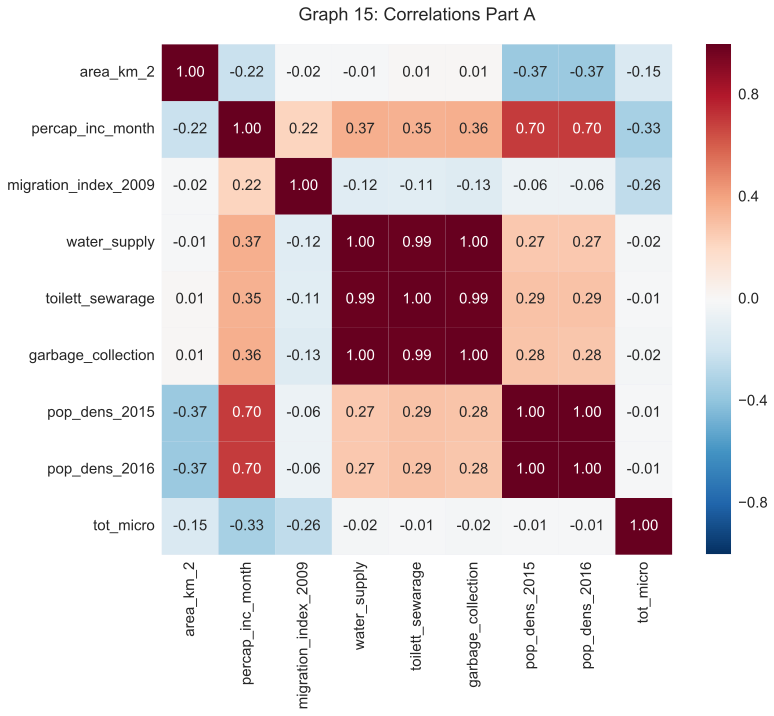

In [78]:
fig = plt.figure(figsize=(12,10))
cm = np.corrcoef(brazil_clean[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols,
                 xticklabels=cols)

plt.title("Graph 15: Correlations Part A\n")
plt.tight_layout()
plt.savefig('../zika_analysis_graphs/graph15_corr_mat.png', dpi=300)
plt.show()

In [79]:
cols =['tot_micro', '2015_12_relh', '2015_12_tmpf', '2016_1_relh', '2016_1_tmpf', '2016_2_relh', '2016_2_tmpf']

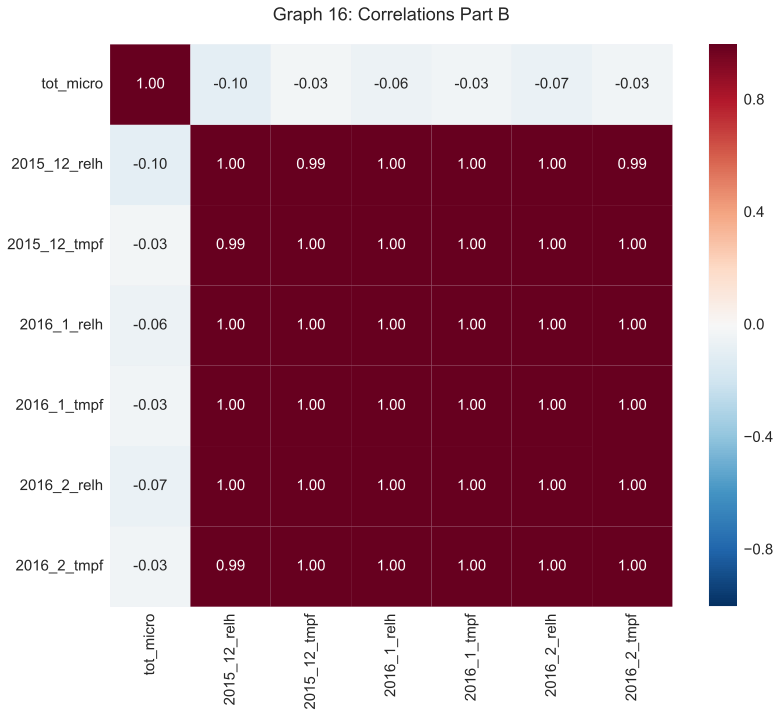

In [80]:
fig = plt.figure(figsize=(12,10))
cm = np.corrcoef(brazil_clean[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols,
                 xticklabels=cols)

plt.title("Graph 16: Correlations Part B\n")
plt.tight_layout()
plt.savefig('../zika_analysis_graphs/graph16_corr_mat.png', dpi=300)
plt.show()

In [81]:
cols=['2016_3_relh', '2016_3_tmpf', '2016_4_relh', '2016_4_tmpf', '2016_5_relh', '2016_5_tmpf',  'tot_micro']

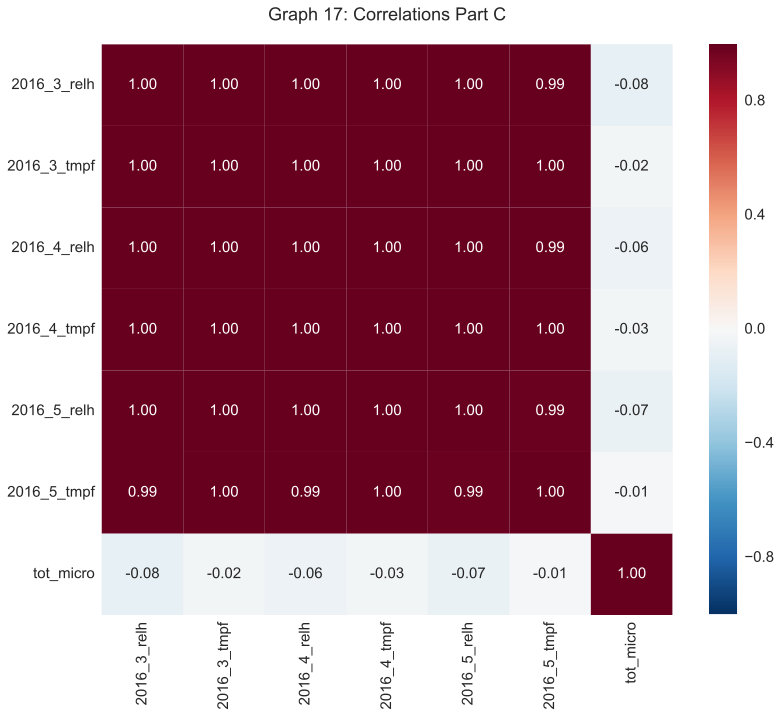

In [82]:
fig = plt.figure(figsize=(12,10))
cm = np.corrcoef(brazil_clean[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols,
                 xticklabels=cols)

plt.title("Graph 17: Correlations Part C\n")
plt.tight_layout()
plt.savefig('../zika_analysis_graphs/graph17_corr_mat.png', dpi=300)
plt.show()

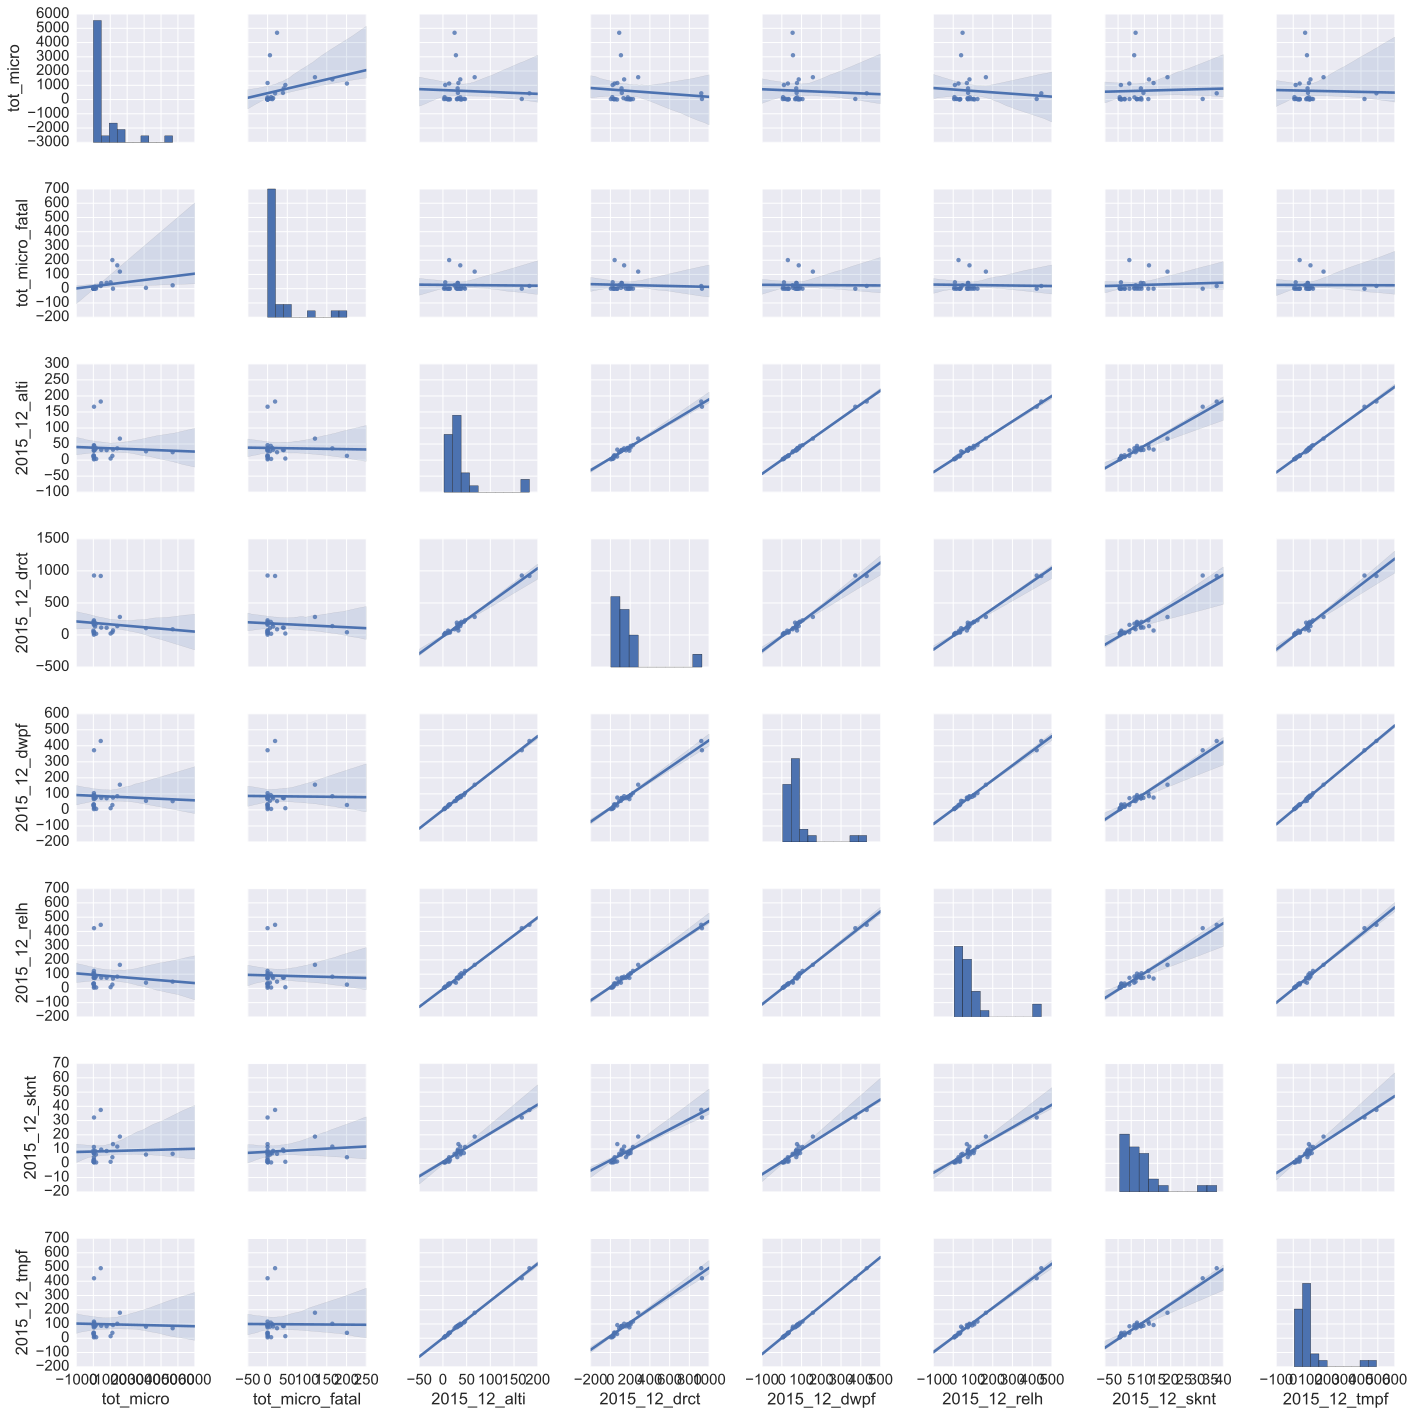

In [83]:
####################################
## December 2015 weather has affected microce?
####################################
cols = ['tot_micro', 'tot_micro_fatal', '2015_12_alti', '2015_12_drct', 
         '2015_12_dwpf', '2015_12_relh', '2015_12_sknt', 
         '2015_12_tmpf']
sns.pairplot(brazil_clean[cols], kind='reg', size=2.5)
plt.tight_layout()
# plt.savefig('./figures/scatter.png', dpi=300)
plt.show()

In [84]:
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNetCV, SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report

In [85]:
print target.shape, predictors.shape
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.3, random_state=None)
print X_train.shape, X_test.shape, y_train.shape, y_test.shape

(27,) (27, 126)
(18, 126) (9, 126) (18,) (9,)


In [86]:
####################################
# Linear Regression
###################################
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [87]:
print lr.predict(X_train)
print '\n==========\n'
print lr.coef_[:10]

[  4.66000000e+02   3.11000000e+03   9.99999996e-01   9.90000000e+01
   1.56800000e+03   3.50000000e+01   3.30000000e+01   1.41500000e+03
   3.20000000e+01   2.90000000e+01   3.00000000e+00   4.30000000e+01
   4.90000000e+01   1.16100000e+03   2.80000000e+01   7.85000000e+02
   4.50000000e+01   1.02100000e+03]


[ -3.62206975e-01   3.57846699e-01   3.47165691e-01  -3.36837769e-01
  -1.48158522e-01  -1.28524909e-03  -1.42326101e+00   1.61768670e-02
  -1.44575087e-04   9.39156481e-04]


In [88]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

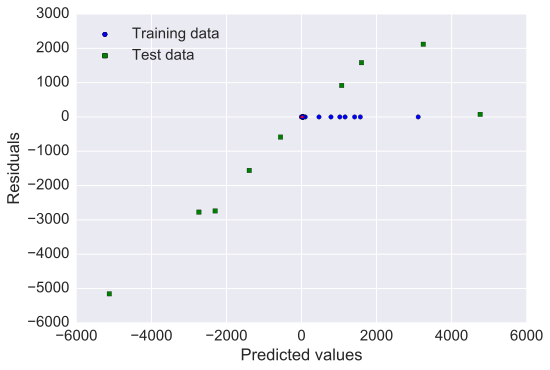

In [89]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='green', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-20, xmax=50, lw=2, color='red')
plt.tight_layout()
plt.show()

In [90]:
print "Linear Regression:\n"
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

Linear Regression:

MSE train: 0.000, test: 5826053.682
R^2 train: 1.000, test: -1.833


In [91]:
####################################
# Ridge
###################################
model = Ridge()
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))

In [92]:
grid.fit(X_train, y_train)

//anaconda/lib/python2.7/site-packages/sklearn/linear_model/ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


GridSearchCV(cv=None, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': array([  1.00000e+00,   1.00000e-01,   1.00000e-02,   1.00000e-03,
         1.00000e-04,   0.00000e+00])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [93]:
print grid.best_params_
print "==============\n"
print grid.best_estimator_.alpha

{'alpha': 1.0}

1.0


In [94]:
ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)
print ridge.coef_ [:10]

[ -3.62087313e-01   3.57705463e-01   3.47046659e-01  -3.36698774e-01
  -1.48112882e-01  -1.28485572e-03  -1.42225477e+00   1.61823415e-02
  -1.44164514e-04   9.39079473e-04]


In [95]:
print "Ridge Results:\n"
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

Ridge Results:

MSE train: 0.004, test: 5824185.275
R^2 train: 1.000, test: -1.832


In [96]:
####################################
# Lasso
###################################
model = Lasso()
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))

In [97]:
grid.fit(X_train, y_train)

//anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)
//anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:454: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


GridSearchCV(cv=None, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': array([  1.00000e+00,   1.00000e-01,   1.00000e-02,   1.00000e-03,
         1.00000e-04,   0.00000e+00])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [98]:
print grid.best_params_
print "\n==============\n"
print grid.best_estimator_.alpha

{'alpha': 0.10000000000000001}


0.1


In [99]:
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)
print lasso.coef_[:10]

[  6.65363138e-04   6.31844956e-05  -6.80577914e-05   7.10322374e-05
  -0.00000000e+00   5.00887778e-05  -7.02568013e+00  -0.00000000e+00
  -2.00621398e-04  -8.59917942e-05]


In [100]:
print "Lasso Results:\n"
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

Lasso Results:

MSE train: 4.029, test: 1196894.645
R^2 train: 1.000, test: 0.418


In [101]:
####################################
## Regression Tree
###################################

In [102]:
from sklearn.tree import DecisionTreeRegressor
treereg = DecisionTreeRegressor()

params = {'max_depth':[1,2,3,4,5,6], 
          'max_features':[1,2,3,4], 
          'max_leaf_nodes':[5,6,7,8,9,10], 
          'min_samples_leaf':[1,2,3,4],
          'min_samples_split':[1,2,3,4]}

scoring  = 'mean_squared_error'
estimator_rgt = GridSearchCV(treereg, params, scoring=scoring, n_jobs=-1, cv=5,verbose=1)

In [103]:
estimator_rgt.fit(X_train, y_train)

Fitting 5 folds for each of 2304 candidates, totalling 11520 fits


[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 1800 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 4300 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done 7800 tasks      | elapsed:   31.8s
[Parallel(n_jobs=-1)]: Done 11520 out of 11520 | elapsed:   47.0s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [1, 2, 3, 4], 'max_leaf_nodes': [5, 6, 7, 8, 9, 10], 'min_samples_split': [1, 2, 3, 4], 'max_depth': [1, 2, 3, 4, 5, 6], 'min_samples_leaf': [1, 2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, scoring='mean_squared_error',
       verbose=1)

In [104]:
print "Best Estimator", estimator_rgt.best_estimator_
print "\n=============\n"
print "Best Scores", estimator_rgt.best_score_
print "\n=============\n"
print np.sqrt(-estimator_rgt.best_score_)

Best Estimator DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=4,
           max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')


Best Scores -337739.505364


581.15359877


In [105]:
## predictions
preds_rgt = estimator_rgt.predict(X_test)
## mse
mse = mean_squared_error(y_test, estimator_rgt.predict(X_test))
print("MSE: %.3f" % mse)
print "\n=========\n"
r2 = r2_score(y_test, preds_rgt)
print ("R^2: %3f" %r2)

MSE: 2292092.428


R^2: -0.114433


In [106]:
# Tree with best scores
treereg = DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=2,
           max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=3,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')
treereg.fit(predictors, target)
# Features Importance
features= pd.DataFrame({'feature':predictors.columns, 'importance':treereg.feature_importances_})
features.sort_values(by='importance', ascending=False)

feature  importance
80      2015_9_drct    0.813701
29     2015_12_sknt    0.122760
95      2016_2_sknt    0.054164
65      2015_6_sknt    0.009375
68      2015_7_drct    0.000000
69      2015_7_dwpf    0.000000
93      2016_2_dwpf    0.000000
66      2015_6_tmpf    0.000000
92      2016_2_drct    0.000000
91      2016_2_alti    0.000000
90      2016_1_tmpf    0.000000
89      2016_1_sknt    0.000000
88      2016_1_relh    0.000000
87      2016_1_dwpf    0.000000
86      2016_1_drct    0.000000
85      2016_1_alti    0.000000
84      2015_9_tmpf    0.000000
83      2015_9_sknt    0.000000
82      2015_9_relh    0.000000
81      2015_9_dwpf    0.000000
67      2015_7_alti    0.000000
79      2015_9_alti    0.000000
78      2015_8_tmpf    0.000000
77      2015_8_sknt    0.000000
76      2015_8_relh    0.000000
75      2015_8_dwpf    0.000000
74      2015_8_drct    0.000000
73      2015_8_alti    0.000000
72      2015_7_tmpf    0.000000
71      2015_7_sknt    0.000000
..              ...         ...
33      2015_1_dwpf    0.000000
34      2015_1_relh    0.000000
61      2015_6_alti    0.000000
60      2015_5_tmpf    0.000000
59      2015_5_sknt    0.000000
58      2015_5_relh    0.000000
57      2015_5_dwpf    0.000000
56      2015_5_drct    0.000000
55      2015_5_alti    0.000000
54      2015_4_tmpf    0.000000
53      2015_4_sknt    0.000000
52      2015_4_relh    0.000000
51      2015_4_dwpf    0.000000
50      2015_4_drct    0.000000
49      2015_4_alti    0.000000
48      2015_3_tmpf    0.000000
47      2015_3_sknt    0.000000
46      2015_3_relh    0.000000
45      2015_3_dwpf    0.000000
44      2015_3_drct    0.000000
43      2015_3_alti    0.000000
42      2015_2_tmpf    0.000000
41      2015_2_sknt    0.000000
40      2015_2_relh    0.000000
39      2015_2_dwpf    0.000000
38      2015_2_drct    0.000000
37      2015_2_alti    0.000000
36      2015_1_tmpf    0.000000
35      2015_1_sknt    0.000000
125  rate_micro_5_4    0.000000

[126 rows x 2 columns]

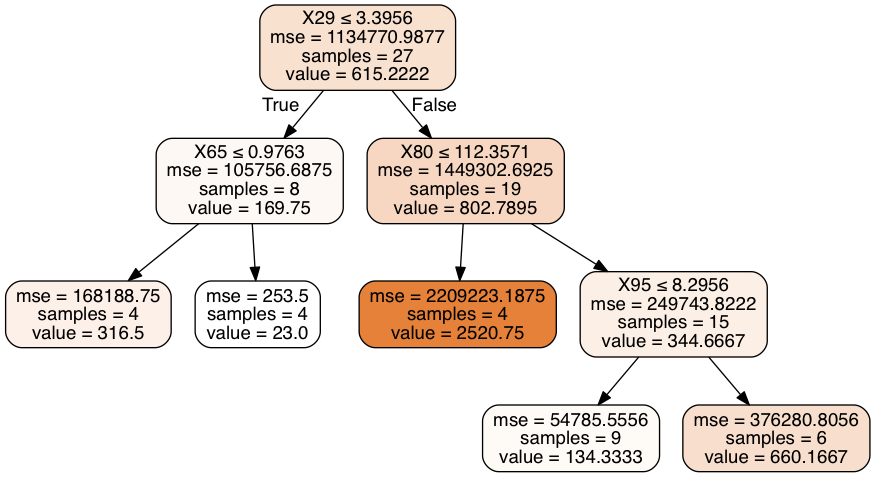

In [107]:
from IPython.display import Image
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
import pydot

## Decision Tree with Best Parameters fitted before

dot_data = StringIO()  

export_graphviz(treereg, out_file=dot_data,  
               filled=True, rounded=True,
               special_characters=True)  

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [108]:
####################################
## Random Forest Regression
###################################
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor( )

params = {'max_depth':[3,4,5], 
          'max_features':[2,3,4], 
          'max_leaf_nodes':[5,6,7], 
          'min_samples_split':[3,4],
         'n_estimators': np.arange(100,200,10)
         }

estimator_rfr = GridSearchCV(forest, params, n_jobs=-1,  cv=5,verbose=1)                              


In [109]:
estimator_rfr.fit(X_train, y_train)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   49.8s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done 2700 out of 2700 | elapsed: 12.5min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [2, 3, 4], 'max_leaf_nodes': [5, 6, 7], 'min_samples_split': [3, 4], 'n_estimators': array([100, 110, 120, 130, 140, 150, 160, 170, 180, 190]), 'max_depth': [3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [110]:
print "Best Estimator", estimator_rfr.best_estimator_
print "\n=============\n"
print "Best Scores", estimator_rfr.best_score_
print "\n=============\n"
print np.sqrt(-estimator_rfr.best_score_)

Best Estimator RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features=2, max_leaf_nodes=7, min_samples_leaf=1,
           min_samples_split=3, min_weight_fraction_leaf=0.0,
           n_estimators=140, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


Best Scores -194.50544917


13.9465210418


In [111]:
y_train_pred = estimator_rfr.predict(X_train)
y_test_pred = estimator_rfr.predict(X_test)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 98192.968, test: 1463746.883
R^2 train: 0.852, test: 0.288


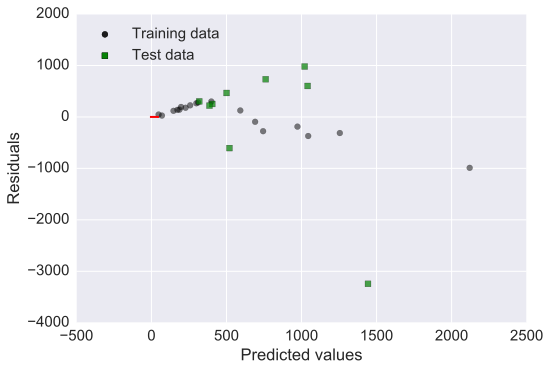

In [112]:
plt.scatter(y_train_pred, y_train_pred - y_train, 
            c='black', marker='o', s=35, alpha=0.5,
            label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, 
            c='green', marker='s', s=35, alpha=0.7,
            label='Test data')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.tight_layout()
plt.show()

In [113]:
#predictions
pred_rdf = estimator_rfr.predict(X_test)

# Features Importance
forest = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features=4, max_leaf_nodes=7, min_samples_leaf=1,
           min_samples_split=4, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(predictors, target)

features = pd.DataFrame({'feature':predictors.columns, 'importance':forest.feature_importances_})
                        
features.sort_values(by='importance', ascending=False)


feature    importance
121         preva_micro_4  4.350463e-02
124        rate_micro_4_3  4.041119e-02
120         preva_micro_3  3.597148e-02
7    migration_index_2009  2.430496e-02
125        rate_micro_5_4  2.259137e-02
119         preva_micro_2  2.188123e-02
12          pop_dens_2016  2.172676e-02
117              2016long  2.053543e-02
4                  region  1.896833e-02
38            2015_2_drct  1.827595e-02
1         women2015_15-44  1.744267e-02
11          pop_dens_2015  1.681038e-02
33            2015_1_dwpf  1.673869e-02
47            2015_3_sknt  1.658546e-02
88            2016_1_relh  1.615525e-02
76            2015_8_relh  1.591819e-02
63            2015_6_dwpf  1.522733e-02
3         women2016_15-44  1.408047e-02
84            2015_9_tmpf  1.319343e-02
27           2015_12_dwpf  1.311337e-02
23           2015_11_sknt  1.291882e-02
96            2016_2_tmpf  1.244494e-02
100           2016_3_relh  1.156542e-02
104           2016_4_drct  1.144046e-02
20           2015_11_drct  1.100818e-02
102           2016_3_tmpf  1.097420e-02
0           men2015_15-44  1.094547e-02
91            2016_2_alti  1.081370e-02
118              2016lati  1.061963e-02
98            2016_3_drct  1.054233e-02
..                    ...           ...
19           2015_11_alti  2.322188e-03
114           2016_5_tmpf  2.300458e-03
9        toilett_sewarage  1.952612e-03
92            2016_2_drct  1.790149e-03
87            2016_1_dwpf  1.706700e-03
55            2015_5_alti  1.638072e-03
48            2015_3_tmpf  1.254313e-03
123        rate_micro_3_2  1.092500e-03
36            2015_1_tmpf  1.082838e-03
90            2016_1_tmpf  9.128374e-04
37            2015_2_alti  8.921760e-04
82            2015_9_relh  8.903387e-04
103           2016_4_alti  8.444767e-04
89            2016_1_sknt  7.510691e-04
70            2015_7_relh  7.213256e-04
75            2015_8_dwpf  6.767846e-04
52            2015_4_relh  6.247488e-04
42            2015_2_tmpf  6.214418e-04
67            2015_7_alti  5.315433e-04
21           2015_11_dwpf  4.377719e-04
69            2015_7_dwpf  3.043432e-04
99            2016_3_dwpf  2.202916e-04
71            2015_7_sknt  2.047992e-04
14           2015_10_drct  2.032563e-04
112           2016_5_relh  1.151945e-04
79            2015_9_alti  9.523435e-07
62            2015_6_drct  0.000000e+00
32            2015_1_drct  0.000000e+00
49            2015_4_alti  0.000000e+00
85            2016_1_alti  0.000000e+00

[126 rows x 2 columns]

In [114]:
####################################
## Gradient BoostingRegressor
###################################
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.grid_search import GridSearchCV

grad_est = GradientBoostingRegressor()

params = {"max_depth": [3,5,10,20],
          "max_features": [None, "auto"],
          "min_samples_leaf": [1, 3, 5, 7, 10],
          "min_samples_split": [2, 5, 7],
          'n_estimators': np.arange(100,200,10)
         }
estimator_gbr = GridSearchCV(grad_est, params, n_jobs=-1, cv=5,verbose=1)

In [115]:
estimator_gbr.fit(X_train, y_train)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 568 tasks      | elapsed:   18.0s
[Parallel(n_jobs=-1)]: Done 1268 tasks      | elapsed:   39.4s
[Parallel(n_jobs=-1)]: Done 2168 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 3268 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 4568 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 6000 out of 6000 | elapsed:  3.0min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.1, loss='ls',
             max_depth=3, max_features=None, max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [None, 'auto'], 'min_samples_split': [2, 5, 7], 'n_estimators': array([100, 110, 120, 130, 140, 150, 160, 170, 180, 190]), 'max_depth': [3, 5, 10, 20], 'min_samples_leaf': [1, 3, 5, 7, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [116]:
print "Best Estimator", estimator_gbr.best_estimator_
print "\n=============\n"
print "Best Scores", estimator_gbr.best_score_
print "\n=============\n"
print np.sqrt(-estimator_gbr.best_score_)

Best Estimator GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.1, loss='ls',
             max_depth=3, max_features='auto', max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=160,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)


Best Scores -1.11498252387


1.05592732888


In [117]:
y_train_gbr = estimator_gbr.predict(X_train)
y_test_gbr = estimator_gbr.predict(X_test)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_gbr),
        mean_squared_error(y_test, y_test_gbr)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_gbr),
        r2_score(y_test, y_test_gbr)))

MSE train: 0.000, test: 1155093.185
R^2 train: 1.000, test: 0.438


In [118]:
# Fit regression model using best pararmeters from GBR USING ensemble
from sklearn import ensemble
from sklearn.utils import shuffle

params = {'max_features': None, 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 1,
          'n_estimators': 120, 'loss': 'ls', 'alpha':0.9, 'subsample':1.0, 'learning_rate':0.1}

grad_est = ensemble.GradientBoostingRegressor(**params)

grad_est.fit(X_train, y_train) ## Fitting
# pred_gbre = grad_est.predict()
###################################
pred_gbre = grad_est.predict(X_test)
mse = mean_squared_error(y_test, grad_est.predict(X_test))
print("MSE: %.3f" % mse)

MSE: 1211443.673


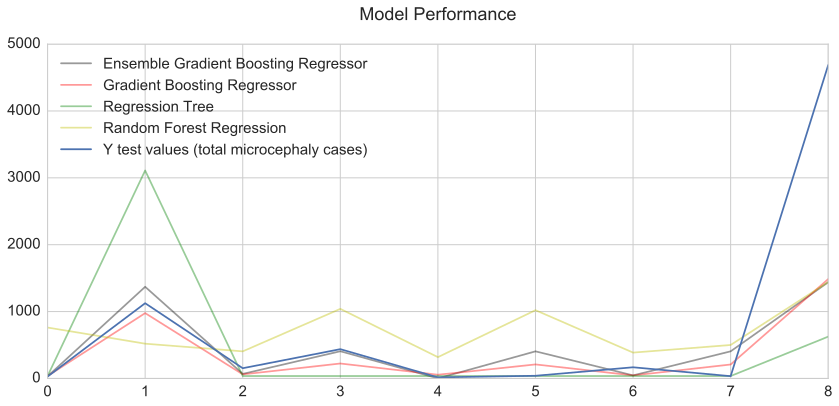

In [119]:
# predictions and actual values
pred_gbr = estimator_gbr.predict(X_test)
with plt.style.context('seaborn-whitegrid'):
#################################
    plt.figure(figsize=(12, 6))
    plt.plot(pred_gbre, color='black', alpha=0.4, label="Ensemble Gradient Boosting Regressor")
    plt.plot(pred_gbr, color='r', alpha=0.4, label="Gradient Boosting Regressor")
    plt.plot(preds_rgt, color='g', alpha=0.4, label="Regression Tree")
    plt.plot(pred_rdf, color='y', alpha=0.4, label='Random Forest Regression')
    plt.plot(y_test.values, label="Y test values (total microcephaly cases)")
    plt.title('Model Performance\n')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.savefig('../zika_analysis_graphs/model_performance.png', dpi=300)
    plt.show()

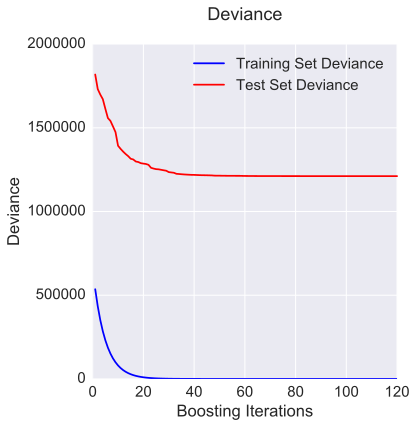

In [120]:
###############################################################################
# Plot training deviance using Ensemble Gradient Boosting Regressor

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(grad_est.staged_predict(X_test)):
    test_score[i] = grad_est.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance\n')
plt.plot(np.arange(params['n_estimators']) + 1, grad_est.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
plt.show()

In [121]:
# Features Importance
grad_est = GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.1, loss='ls',
             max_depth=20, max_features=None, max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=120,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)
grad_est.fit(predictors, target)

features= pd.DataFrame({'feature':predictors.columns, 'importance':grad_est.feature_importances_})
features.sort_values(by='importance', ascending=False)

feature    importance
120       preva_micro_3  3.626236e-01
119       preva_micro_2  3.212017e-01
9      toilett_sewarage  4.942874e-02
1       women2015_15-44  4.119498e-02
8          water_supply  3.868807e-02
0         men2015_15-44  3.755337e-02
10   garbage_collection  3.260983e-02
2         men2016_15-44  3.256803e-02
3       women2016_15-44  2.832409e-02
5             area_km_2  6.223072e-03
121       preva_micro_4  2.715439e-03
123      rate_micro_3_2  1.616336e-03
110         2016_5_drct  1.102439e-03
57          2015_5_dwpf  1.098984e-03
61          2015_6_alti  1.095258e-03
44          2015_3_drct  1.085472e-03
91          2016_2_alti  1.063029e-03
93          2016_2_dwpf  1.055051e-03
103         2016_4_alti  1.014926e-03
86          2016_1_drct  8.574839e-04
95          2016_2_sknt  8.483219e-04
27         2015_12_dwpf  8.289198e-04
26         2015_12_drct  8.133084e-04
30         2015_12_tmpf  8.005505e-04
23         2015_11_sknt  7.718292e-04
81          2015_9_dwpf  7.674868e-04
114         2016_5_tmpf  7.638805e-04
19         2015_11_alti  7.573505e-04
35          2015_1_sknt  7.477246e-04
65          2015_6_sknt  7.434242e-04
..                  ...           ...
79          2015_9_alti  1.338552e-04
52          2015_4_relh  1.149356e-04
16         2015_10_relh  1.103085e-04
116            2015lati  1.048904e-04
75          2015_8_dwpf  9.516626e-05
90          2016_1_tmpf  8.099391e-05
102         2016_3_tmpf  8.098632e-05
118            2016lati  7.377990e-05
14         2015_10_drct  6.986631e-05
70          2015_7_relh  6.682900e-05
28         2015_12_relh  6.378358e-05
20         2015_11_drct  5.251065e-05
94          2016_2_relh  4.986958e-05
25         2015_12_alti  4.754689e-05
88          2016_1_relh  4.653999e-05
66          2015_6_tmpf  4.549086e-05
21         2015_11_dwpf  4.399249e-05
99          2016_3_dwpf  4.372361e-05
46          2015_3_relh  4.233813e-05
100         2016_3_relh  4.138015e-05
97          2016_3_alti  4.071277e-05
54          2015_4_tmpf  3.147091e-05
73          2015_8_alti  3.051952e-05
51          2015_4_dwpf  5.731291e-06
84          2015_9_tmpf  4.100882e-06
40          2015_2_relh  3.590694e-06
96          2016_2_tmpf  3.501106e-06
89          2016_1_sknt  3.239514e-06
124      rate_micro_4_3  1.350683e-06
109         2016_5_alti  1.149141e-07

[126 rows x 2 columns]

In [122]:
####################################
## PCA
###################################

from sklearn.preprocessing import StandardScaler
stc = StandardScaler()
X_train_std = stc.fit_transform(X_train)
X_test_std = stc.transform(X_test)

In [123]:
from sklearn.decomposition import PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([  7.93713919e-01,   6.62192868e-02,   4.59350802e-02,
         2.36472990e-02,   1.74476142e-02,   1.57812580e-02,
         1.17496338e-02,   7.43892692e-03,   6.24659978e-03,
         3.76993594e-03,   2.61036161e-03,   2.01611707e-03,
         1.20707894e-03,   9.93697494e-04,   7.85679505e-04,
         2.84970301e-04,   1.52541111e-04,   5.53442295e-33])

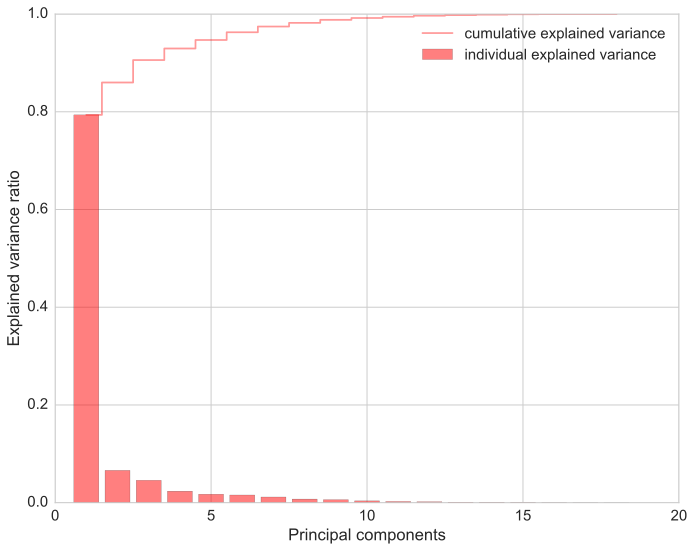

In [124]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(1, figsize=(10, 8))
    plt.bar(range(1, 19), pca.explained_variance_ratio_, alpha=0.5, align='center',
           label='individual explained variance', color='r')
    
    plt.step(range(1, 19), np.cumsum(pca.explained_variance_ratio_), where='mid',
            label='cumulative explained variance', color='r', alpha=0.4)
    
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

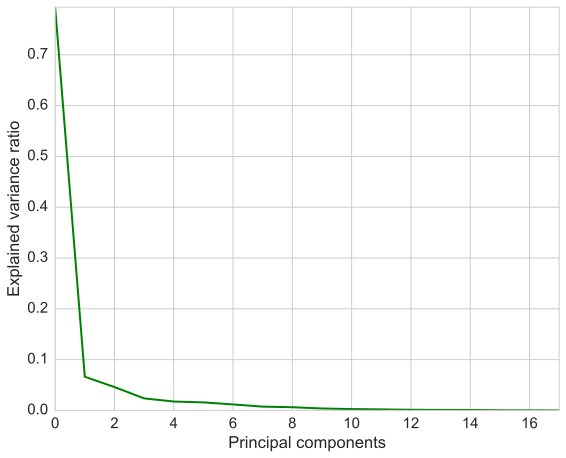

In [125]:
with plt.style.context('seaborn-whitegrid'):
    pca.fit(X_train_std)
    plt.figure(1, figsize=(10, 8))
    plt.clf()
    plt.axes([.2, .2, .7, .7])
    plt.plot(pca.explained_variance_ratio_, linewidth=2, color='green')
    plt.axis('tight')
    plt.xlabel('Principal components')
    plt.ylabel('Explained variance ratio')

In [126]:
######################################################
## Analysis by Weather Seasons 
## Using Best Model 
## Wet Season Dec - Feb
######################################################
tar_ws = 'tot_micro'

not_inlc = ['tot_micro', 'state_city', 'child_0-4_feb2016', 'child_0-4_march2016', 'child_0-4_apr2016', 'child_0-4_may2016', 
            'child_0-4_jun2016', u'capital', 'zika_micro_2', 'zika_micro_fatal_2', 'zika_micro_3',
            'zika_micro_fatal_3', 'zika_micro_4', 'zika_micro_fatal_4', 'zika_micro_5','zika_micro_fatal_5',
            'zika_micro_6', 'zika_micro_fatal_6', 'country', '2016_6_alti', '2016_6_drct', '2016_6_dwpf',
            '2016_6_relh', '2016_6_sknt', '2016_6_tmpf','tot_micro_fatal',
            
           '2015_10_alti', '2015_10_drct', '2015_10_dwpf', '2015_10_relh', '2015_10_sknt', '2015_10_tmpf',
             '2015_11_alti', '2015_11_drct', '2015_11_dwpf','2015_11_relh', '2015_11_sknt','2015_11_tmpf',
'2015_1_alti', '2015_1_drct', '2015_1_dwpf', '2015_1_relh', '2015_1_sknt', '2015_1_tmpf', '2015_2_alti',
'2015_2_drct', '2015_2_dwpf', '2015_2_relh', '2015_2_sknt', '2015_2_tmpf', '2015_3_alti','2015_3_drct',
'2015_3_dwpf', '2015_3_relh', '2015_3_sknt','2015_3_tmpf', '2015_4_alti', '2015_4_drct','2015_4_dwpf', '2015_4_relh',
'2015_4_sknt', '2015_4_tmpf','2015_5_alti', '2015_5_drct','2015_5_dwpf', '2015_5_relh', '2015_5_sknt', '2015_5_tmpf',
'2015_6_alti', '2015_6_drct', '2015_6_dwpf', '2015_6_relh', '2015_6_sknt', '2015_6_tmpf', '2015_7_alti',
'2015_7_drct', '2015_7_dwpf', '2015_7_relh', '2015_7_sknt', '2015_7_tmpf', '2015_8_alti', '2015_8_drct',
'2015_8_dwpf', '2015_8_relh', '2015_8_sknt', '2015_8_tmpf', '2015_9_alti', '2015_9_drct', '2015_9_dwpf', '2015_9_relh',
'2015_9_sknt', '2015_9_tmpf', '2016_3_alti', '2016_3_drct', '2016_3_dwpf', '2016_3_relh', '2016_3_sknt', '2016_3_tmpf',
'2016_4_alti', '2016_4_drct','2016_4_dwpf', '2016_4_relh', '2016_4_sknt', '2016_4_tmpf', '2016_5_alti', '2016_5_drct',
'2016_5_dwpf', '2016_5_relh',
           ]

columns_ws_ = brazil_clean

In [127]:
####################################
# Defining Target and Predictors
###################################
target_ws = brazil_clean[tar_ws]
predictors_ws = brazil_clean[[i for i in columns_ws_ if i not in not_inlc]]

In [128]:
print target_ws.shape, predictors_ws.shape
X_train_ws, X_test_ws, y_train_ws, y_test_ws = train_test_split(predictors_ws, target_ws, test_size=0.3, random_state=None)
print X_train_ws.shape, X_test_ws.shape, y_train_ws.shape, y_test_ws.shape

(27,) (27, 44)
(18, 44) (9, 44) (18,) (9,)


In [129]:
####################################
# Random Forest Regressor
###################################
forest_ws = RandomForestRegressor( )

params = {'max_depth':[3,4,5], 
          'max_features':[2,3,4], 
          'max_leaf_nodes':[5,6,7], 
          'min_samples_split':[3,4],
         'n_estimators': np.arange(100,200,10)
         }

estimator_rfr_ws = GridSearchCV(forest_ws, params, n_jobs=-1,  cv=5,verbose=1) 

In [130]:
estimator_rfr_ws.fit(X_train_ws, y_train_ws)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 2700 out of 2700 | elapsed: 11.8min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [2, 3, 4], 'max_leaf_nodes': [5, 6, 7], 'min_samples_split': [3, 4], 'n_estimators': array([100, 110, 120, 130, 140, 150, 160, 170, 180, 190]), 'max_depth': [3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [131]:
print "Best Estimator", estimator_rfr_ws.best_estimator_
print "\n=============\n"
print "Best Scores", estimator_rfr_ws.best_score_
print "\n=============\n"
print np.sqrt(-estimator_rfr_ws.best_score_)

Best Estimator RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features=2, max_leaf_nodes=5, min_samples_leaf=1,
           min_samples_split=4, min_weight_fraction_leaf=0.0,
           n_estimators=130, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


Best Scores -11.2756830603


3.3579283882


In [132]:
y_train_pred_ws = estimator_rfr_ws.predict(X_train_ws)
y_test_pred_ws = estimator_rfr_ws.predict(X_test_ws)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train_ws, y_train_pred_ws),
        mean_squared_error(y_test_ws, y_test_pred_ws)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train_ws, y_train_pred_ws),
        r2_score(y_test_ws, y_test_pred_ws)))

MSE train: 128856.182, test: 1560875.116
R^2 train: 0.788, test: 0.277


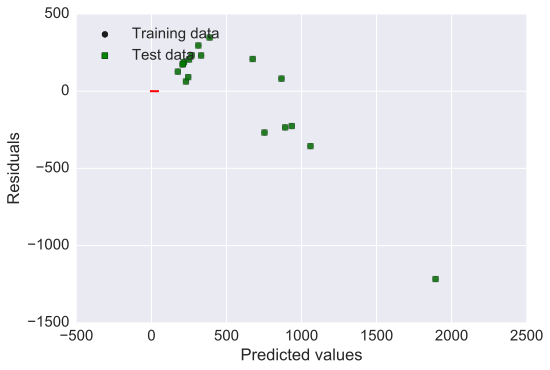

In [133]:
plt.scatter(y_train_pred_ws, y_train_pred_ws - y_train_ws, 
            c='black', marker='o', s=35, alpha=0.5,
            label='Training data')
plt.scatter(y_train_pred_ws, y_train_pred_ws - y_train_ws, 
            c='green', marker='s', s=35, alpha=0.7,
            label='Test data')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.tight_layout()

# plt.savefig('./figures/slr_residuals.png', dpi=300)
plt.show()

In [134]:
#predictions
pred_rdf_ws = estimator_rfr_ws.predict(X_test_ws)

# Features Importance
forest = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features=4, max_leaf_nodes=5, min_samples_leaf=1,
           min_samples_split=3, min_weight_fraction_leaf=0.0,
           n_estimators=160, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

forest.fit(predictors_ws, target_ws)

features= pd.DataFrame({'feature':predictors_ws.columns, 'importance':forest.feature_importances_})
features.sort_values(by='importance', ascending=False)

feature  importance
38         preva_micro_3    0.103699
39         preva_micro_4    0.096548
37         preva_micro_2    0.089167
40         preva_micro_5    0.072492
6       percap_inc_month    0.034635
43        rate_micro_5_4    0.033953
42        rate_micro_4_3    0.031572
1        women2015_15-44    0.026078
8           water_supply    0.025657
10    garbage_collection    0.024962
3        women2016_15-44    0.024804
29           2016_2_sknt    0.024507
4                 region    0.024444
36              2016lati    0.022294
0          men2015_15-44    0.021654
34              2015lati    0.021404
14          2015_12_drct    0.020321
17          2015_12_sknt    0.019538
12         pop_dens_2016    0.018226
15          2015_12_dwpf    0.017949
9       toilett_sewarage    0.017657
24           2016_1_tmpf    0.016970
11         pop_dens_2015    0.016804
22           2016_1_relh    0.015749
33              2015long    0.015714
26           2016_2_drct    0.013799
41        rate_micro_3_2    0.013352
23           2016_1_sknt    0.012777
32           2016_5_tmpf    0.012563
2          men2016_15-44    0.012015
5              area_km_2    0.011182
20           2016_1_drct    0.010357
27           2016_2_dwpf    0.010230
16          2015_12_relh    0.009865
30           2016_2_tmpf    0.008988
28           2016_2_relh    0.007664
19           2016_1_alti    0.007381
21           2016_1_dwpf    0.006543
31           2016_5_sknt    0.006441
7   migration_index_2009    0.005468
13          2015_12_alti    0.005122
25           2016_2_alti    0.004003
35              2016long    0.003905
18          2015_12_tmpf    0.001547

### REFERENCES:

Associated Press. (2016). Higher Temperatures Make Zika Mosquito Spread Disease More. Retrieved June 25, 2016, from https://weather.com/science/news/warm-temperatures-allow-zika-spreading

Calvet, G., Aguiar, R. S., Melo, A. S. O., Sampaio, S. A., de Filippis, I., Fabri, A., … de Filippis, A. M. B. (2016). Detection and sequencing of Zika virus from amniotic fluid of fetuses with microcephaly in Brazil: A case study. The Lancet Infectious Diseases, 3099(16), 1–8. http://doi.org/10.1016/S1473-3099(16)00095-5

Carlson, C. J., Dougherty, E. R., & Getz, W. (2016). An ecological assessment of the pandemic threat of Zika virus. bioRxiv Beta. http://doi.org/10.1101/040386

CDC. (2016). CDC Epidemic Prevention Initiative, GitHub repository. Retrieved June 1, 2016, from https://github.com/cdcepi/zika

Gillis, J. (2016, February 20). In Zika Epidemic, a Warning on Climate Change. New York Times. Retrieved from http://www.nytimes.com/2016/02/21/world/americas/in-zika-epidemic-a-warning-on-climate-change.html?ribbon-ad-idx=6&rref=science&module=Ribbon&version=context&region=Header&action=click&contentCollection=Science&pgtype=article&_r=0

Githeko, A. K., Lindsay, S. W., Confalonieri, U. E., & Patz, J. A. (2000). Climate change and vector-borne diseases: a regional analysis.

Instituto Brasileiro de Geografia e Estatística. (2016). Projeção da População das Unidades da Federação por sexo e idade: 2000-2030.

Kindhauser, M. K., Allen, T., Frank, V., Santhana, R. S., & Dye, C. (2016). Zika: the origin and spread of a mosquito-borne virus. Retrieved from http://dx.doi.org/10.2471/BLT.16.170860

Kruskal, J. (2016, February). Zika Virus : How Poverty and Politics Will Determine its Social Costs. International Policy Digest, 1–10. Retrieved from http://intpolicydigest.org/2016/02/19/zika-virus-poverty-politics-will-determine-social-costs/

Ministério da Saúde -Brazil. (2016). Informe Epidemiologico. Retrieved from http://portalsaude.saude.gov.br/index.php/o-ministerio/principal/leia-mais-o-ministerio/197-secretaria-svs/20799-microcefalia

Missouri Department of Health and Senior Services. (2015). Principles of Infectious Disease Epidemiology - Statistical Measures. Retrieved from http://health.mo.gov/training/epi/PrevalenceRates-b.html

Osava, B. M. (2016). Zika Epidemic Offers Sanitation a Chance in Brazil. Retrieved from http://www.ipsnews.net/2016/02/zika-epidemic-offers-sanitation-a-chance-in-brazil/

Petersen, E., Wilson, M. E., Touch, S., McCloskey, B., Mwaba, P., Bates, M., … Zumla, A. (2016). Rapid Spread of Zika Virus in The Americas - Implications for Public Health Preparedness for Mass Gatherings at the 2016 Brazil Olympic Games. International Journal of Infectious Diseases, 44, 11–15. http://doi.org/10.1016/j.ijid.2016.02.001

Petersen, L., Jamieson, D., Powers, A., & Honein, M. (2016). Zika Virus. The New England Journal of Medicine, 374(16).

The Iowa Environmental Mesonet. (2016). ASOS-AWOS-METAR Data. Retrieved from https://mesonet.agron.iastate.edu/request/download.phtml?network=BR__ASOS

WHO. (2016). WHO Director-General summarizes the outcome of the Emergency Committee regarding clusters of microcephaly and Guillain-Barré syndrome. WHO. World Health Organization.

Yakob, L., & Walker, T. (2016). Zika virus outbreak in the Americas: the need for novel mosquito control methods. The Lancet Global Health. http://doi.org/10.1016/S2214-109X(16)00048-6







In [135]:
%load_ext watermark
%watermark -a 'Mario Javier Carrillo' -u -d -v -p numpy,pandas,matplotlib,scikit-learn
# Sequence of notebooks:
#     1. Brazil_zika.ipynb 
#     2. Brazil_weather_master.ipynb
#     3. brazil_geo_data.ipynb
#     4. brazil_demographics_deforestation.ipynb
#     5. brasil_analysis.ipynb

Mario Javier Carrillo 
last updated: 2016-07-09 

CPython 2.7.11
IPython 4.1.2

numpy 1.10.4
pandas 0.18.0
matplotlib 1.5.1
scikit-learn 0.17.1
